In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),

In [ ]:
known_frames = [
    "AI impacts on businesses, economy, and jobs",
    "AI transformations in education and research",
    "AI in national security and global partnerships",
    "AI disruptions in media and creative industries",
    "AI-based innovative solutions",
    "AI regulations, ethics, and data privacy",
    "AI competition and market dynamics in tech industries",
    "AI in healthcare and climate change",
    "AI in politics, elections, and public opinion",
    "Other",
    "Not AI related"
]

def extract_clean_frame(raw_output):
    for frame in known_frames:
        if frame.lower() in raw_output.lower():
            return frame
    return "unmatched"  # fallback if nothing matched

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')
len(df)

1000

In [ ]:
!pip uninstall -y httpx
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=2b50d1ba590f5f227ae52332c16a24fbf5482c86ce514b183275bd897498297a
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

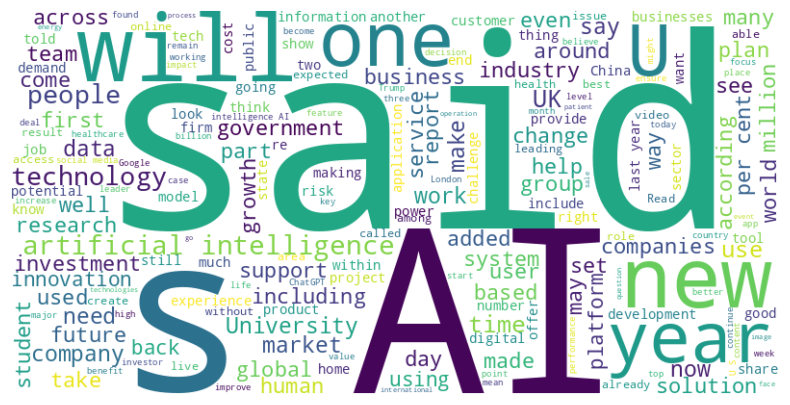

In [ ]:
!pip install googletrans==4.0.0-rc1
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from googletrans import Translator

def plot_wordcloud(df: pd.DataFrame, text_col: str = 'maintext', target_language='en'):
    """
    Generates and displays a word cloud from a specified text column in a DataFrame,
    with an option to translate the text to a target language.

    Args:
        df: A pandas DataFrame with a text column.
        text_col: The name of the text column (default is 'maintext').
        target_language: The language code to translate the text to (default is 'en' for English).
    """
    if text_col not in df.columns:
        print(f"Error: Column '{text_col}' not found in the DataFrame.")
        return

    # Combine all text data into a single string, handling potential non-string data
    text = " ".join(df[text_col].dropna().astype(str))

    if not text:
        print(f"No text data available in column '{text_col}' to generate word cloud.")
        return

    # Initialize the translator
    translator = Translator()

    # Translate the text
    try:
        translated_text = translator.translate(text, dest=target_language).text
    except Exception as e:
        print(f"Translation failed: {e}")
        translated_text = text # Use original text if translation fails

    # Create a WordCloud object
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(translated_text)

    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')
#df = pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

df["frame"] = df["frame"].apply(extract_clean_frame)

plot_wordcloud(df, target_language='en')

In [ ]:
#Can you modify plot_sentiment_lexicon_frequencies_by_country so that there is a gap between the series of bars belonging to the same value and the series of bars
#belonging to the next value? In the concrete, I want a gap between the bar of the last country in a given value, for example Russia in 4, and the bar that
#starts in the new value, for example UK in 5.

#Can you modify plot_sentiment_lexicon_over_time_by_country so that the legend is outside the chart? possibly below the chart in the center

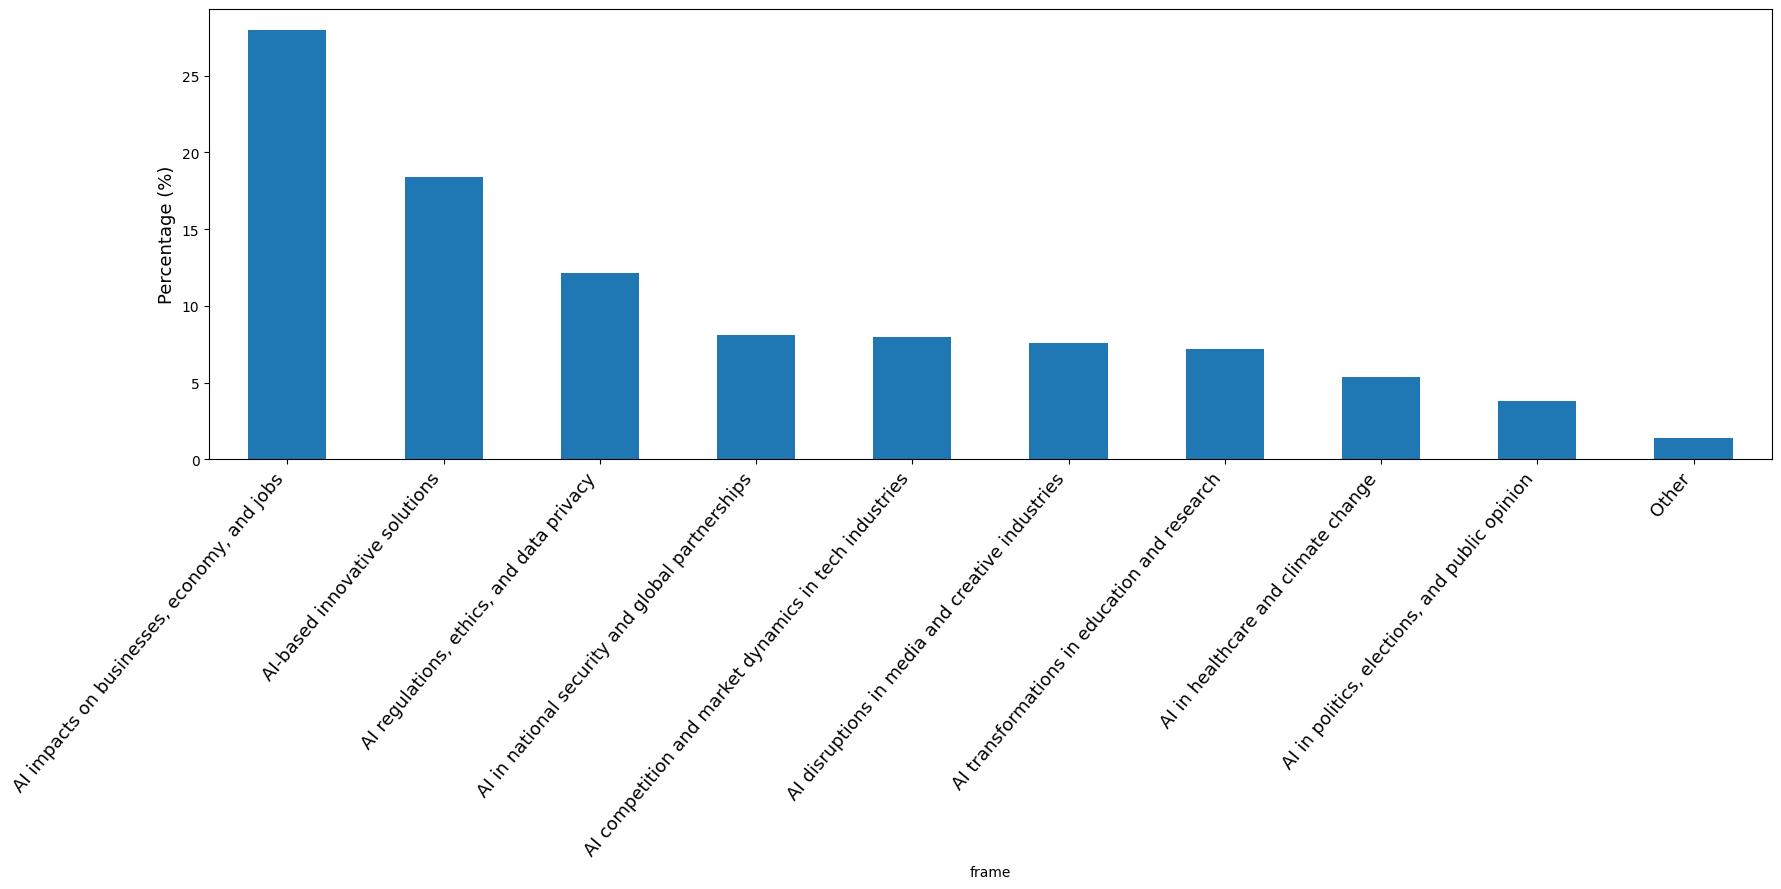

frame
AI impacts on businesses, economy, and jobs              27.944293
AI-based innovative solutions                            18.397416
AI regulations, ethics, and data privacy                 12.150570
AI in national security and global partnerships           8.123928
AI competition and market dynamics in tech industries     7.962458
AI disruptions in media and creative industries           7.609244
AI transformations in education and research              7.215663
AI in healthcare and climate change                       5.358765
AI in politics, elections, and public opinion             3.824806
Other                                                     1.412857
Name: count, dtype: float64


In [ ]:
def plot_total_frame_frequencies(country_dfs, country_names):
    """
    Calculates and plots the total frame frequencies across all provided datasets as percentages.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        country_names: A list of strings, the names of the countries (used for context, not individual bars).
    """
    # Concatenate all dataframes into a single dataframe
    all_data = pd.concat(country_dfs, ignore_index=True)

    # Get the unique frames from the combined data
    all_frames = set()
    for df in country_dfs:
        all_frames.update(df['frame'].unique())
    all_frames = list(all_frames) # Convert to list for consistent ordering

    # Calculate the total count of each frame across all data
    total_frame_counts = all_data['frame'].value_counts()

    # Calculate the total number of rows in the combined data
    total_rows = all_data.shape[0]

    # Calculate the percentage of each frame
    frame_percentages = (total_frame_counts / total_rows) * 100

    # Sort the frames by percentage for better visualization
    frame_percentages_sorted = frame_percentages.sort_values(ascending=False)

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 9))
    frame_percentages_sorted.plot(kind='bar', ax=ax)

    # Add labels and title
    ax.set_ylabel('Percentage (%)', fontsize=13)
    #ax.set_xlabel('Frame', fontsize=13)
    plt.xticks(rotation=50, ha='right', fontsize=13)

    plt.tight_layout()
    plt.show()
    print(frame_percentages_sorted)

# Example usage with your dataframes:
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

plot_total_frame_frequencies(country_dfs, country_names)

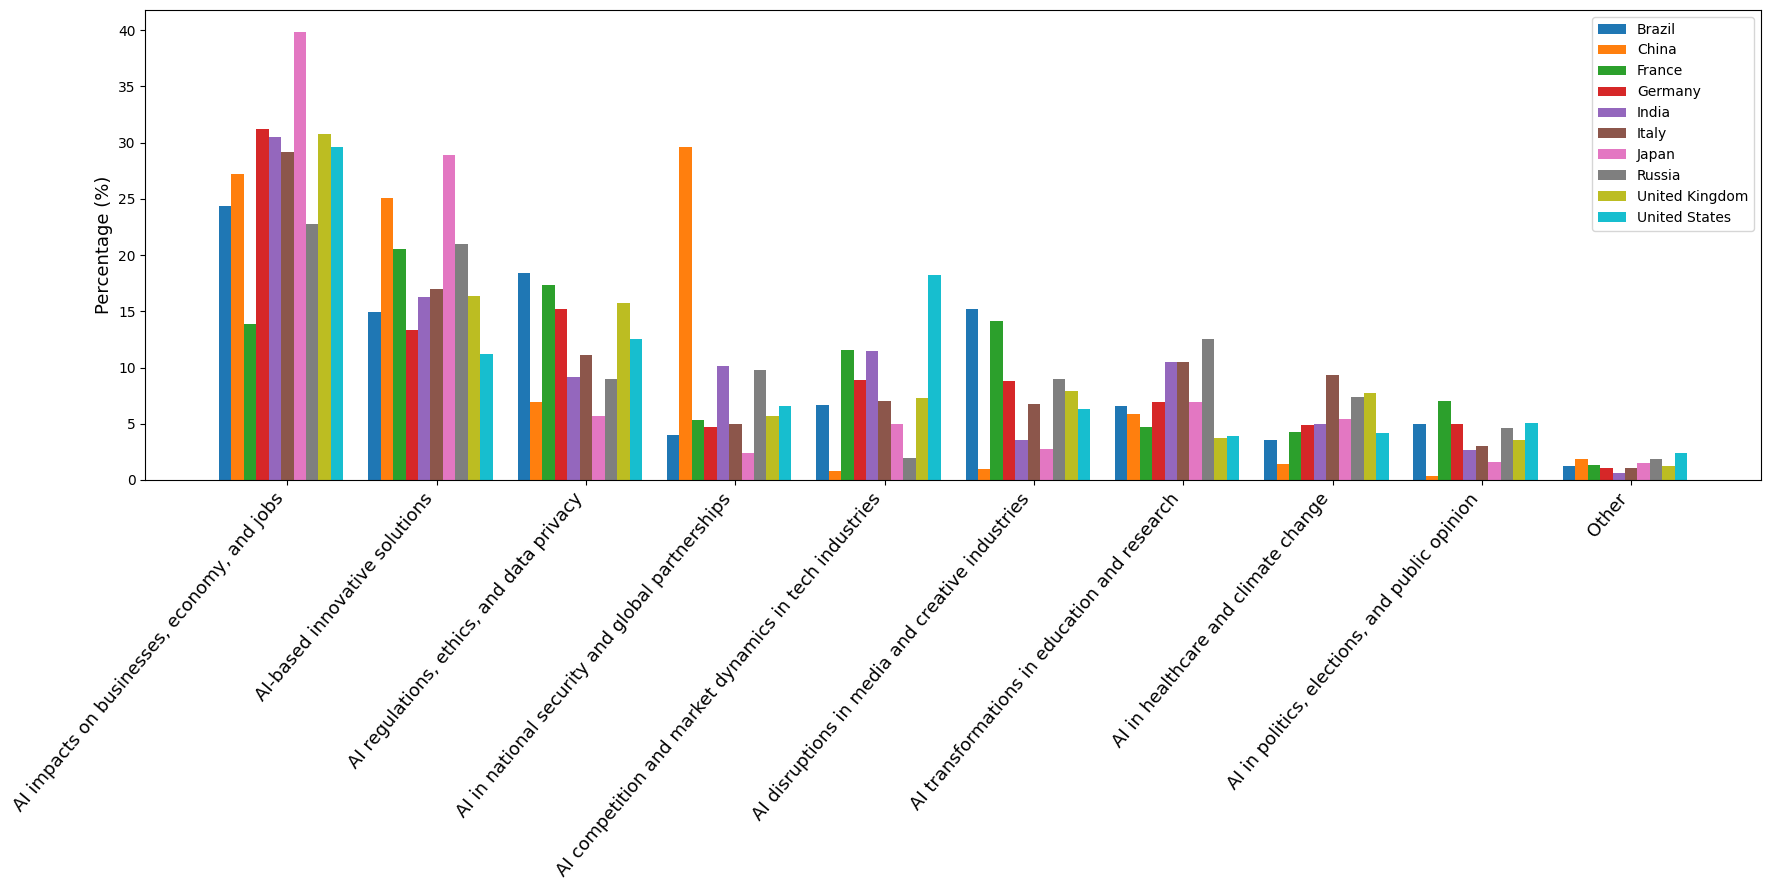

Brazil frequency(%) [24.4, 14.899999999999999, 18.4, 4.0, 6.7, 15.2, 6.6000000000000005, 3.5999999999999996, 5.0, 1.2]
China frequency(%) [27.17271727172717, 25.082508250825082, 6.9306930693069315, 29.592959295929592, 0.77007700770077, 0.9900990099009901, 5.83058305830583, 1.4301430143014302, 0.33003300330033003, 1.87018701870187]
France frequency(%) [13.900000000000002, 20.5, 17.299999999999997, 5.3, 11.600000000000001, 14.099999999999998, 4.7, 4.3, 7.000000000000001, 1.3]
Germany frequency(%) [31.2, 13.3, 15.2, 4.7, 8.9, 8.799999999999999, 6.9, 4.9, 5.0, 1.0999999999999999]
India frequency(%) [30.5, 16.3, 9.2, 10.100000000000001, 11.5, 3.5999999999999996, 10.5, 5.0, 2.7, 0.6]
Italy frequency(%) [29.2, 17.0, 11.1, 5.0, 7.000000000000001, 6.800000000000001, 10.5, 9.3, 3.0, 1.0999999999999999]
Japan frequency(%) [39.800000000000004, 28.9, 5.7, 2.4, 5.0, 2.8000000000000003, 6.9, 5.4, 1.6, 1.5]
Russia frequency(%) [22.8, 21.0, 9.0, 9.8, 2.0, 9.0, 12.5, 7.3999999999999995, 4.6, 1.9]
United

In [ ]:
def plot_frame_frequencies_by_country(country_dfs, country_names, colors=None):
    """
    Plots the frame frequencies of different countries side-by-side for comparison as percentages.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's bars (optional).
    """
    # Get the unique frames from all dataframes
    all_frames = set()
    for df in country_dfs:
        all_frames.update(df['frame'].unique())

    # Create a dictionary to store the frame percentages for each country
    frame_percentages = {frame: [] for frame in all_frames}

    # Populate the dictionary with the frame percentages
    for df in country_dfs:
        total_count = df.shape[0]
        for frame in all_frames:
            count = df[df['frame'] == frame].shape[0]
            percentage = (count / total_count) * 100 if total_count > 0 else 0
            frame_percentages[frame].append(percentage)

    # Calculate the total frequency of each frame across all countries to determine the top frames
    total_frame_counts = {frame: 0 for frame in all_frames}
    for df in country_dfs:
        for frame in all_frames:
            total_frame_counts[frame] += df[df['frame'] == frame].shape[0]

    # Get the top 10 most frequent frames based on total counts
    top_10_frames = sorted(total_frame_counts, key=total_frame_counts.get, reverse=True)[:10]


    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 9))
    x = np.arange(len(top_10_frames))
    width = 0.1
    gap = 0.2 # Define the gap between groups of bars

    # Plot the bars for each country
    for i, country_name in enumerate(country_names):
        percentages = [frame_percentages[frame][i] for frame in top_10_frames]
        color = colors[i] if colors and i < len(colors) else None
        # Adjust the x-position to include the gap
        ax.bar(x + i * width + x * gap, percentages, width, label=country_name, color=color)


    # Add labels, title, and legend
    ax.set_ylabel('Percentage (%)', fontsize=13)
    # Adjust the x-ticks position to be in the center of each group
    ax.set_xticks(x + (len(country_names) - 1) * width / 2 + x * gap + width/2)
    ax.set_xticklabels(top_10_frames, rotation=50, ha='right', fontsize=13)
    ax.legend(fontsize=10)

    plt.tight_layout()
    plt.show()
    for i, country_name in enumerate(country_names):
        percentages = [frame_percentages[frame][i] for frame in top_10_frames]
        print(country_name, "frequency(%)", percentages)


# List of dataframes and country names
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Plot the frame frequencies
plot_frame_frequencies_by_country(country_dfs, country_names)

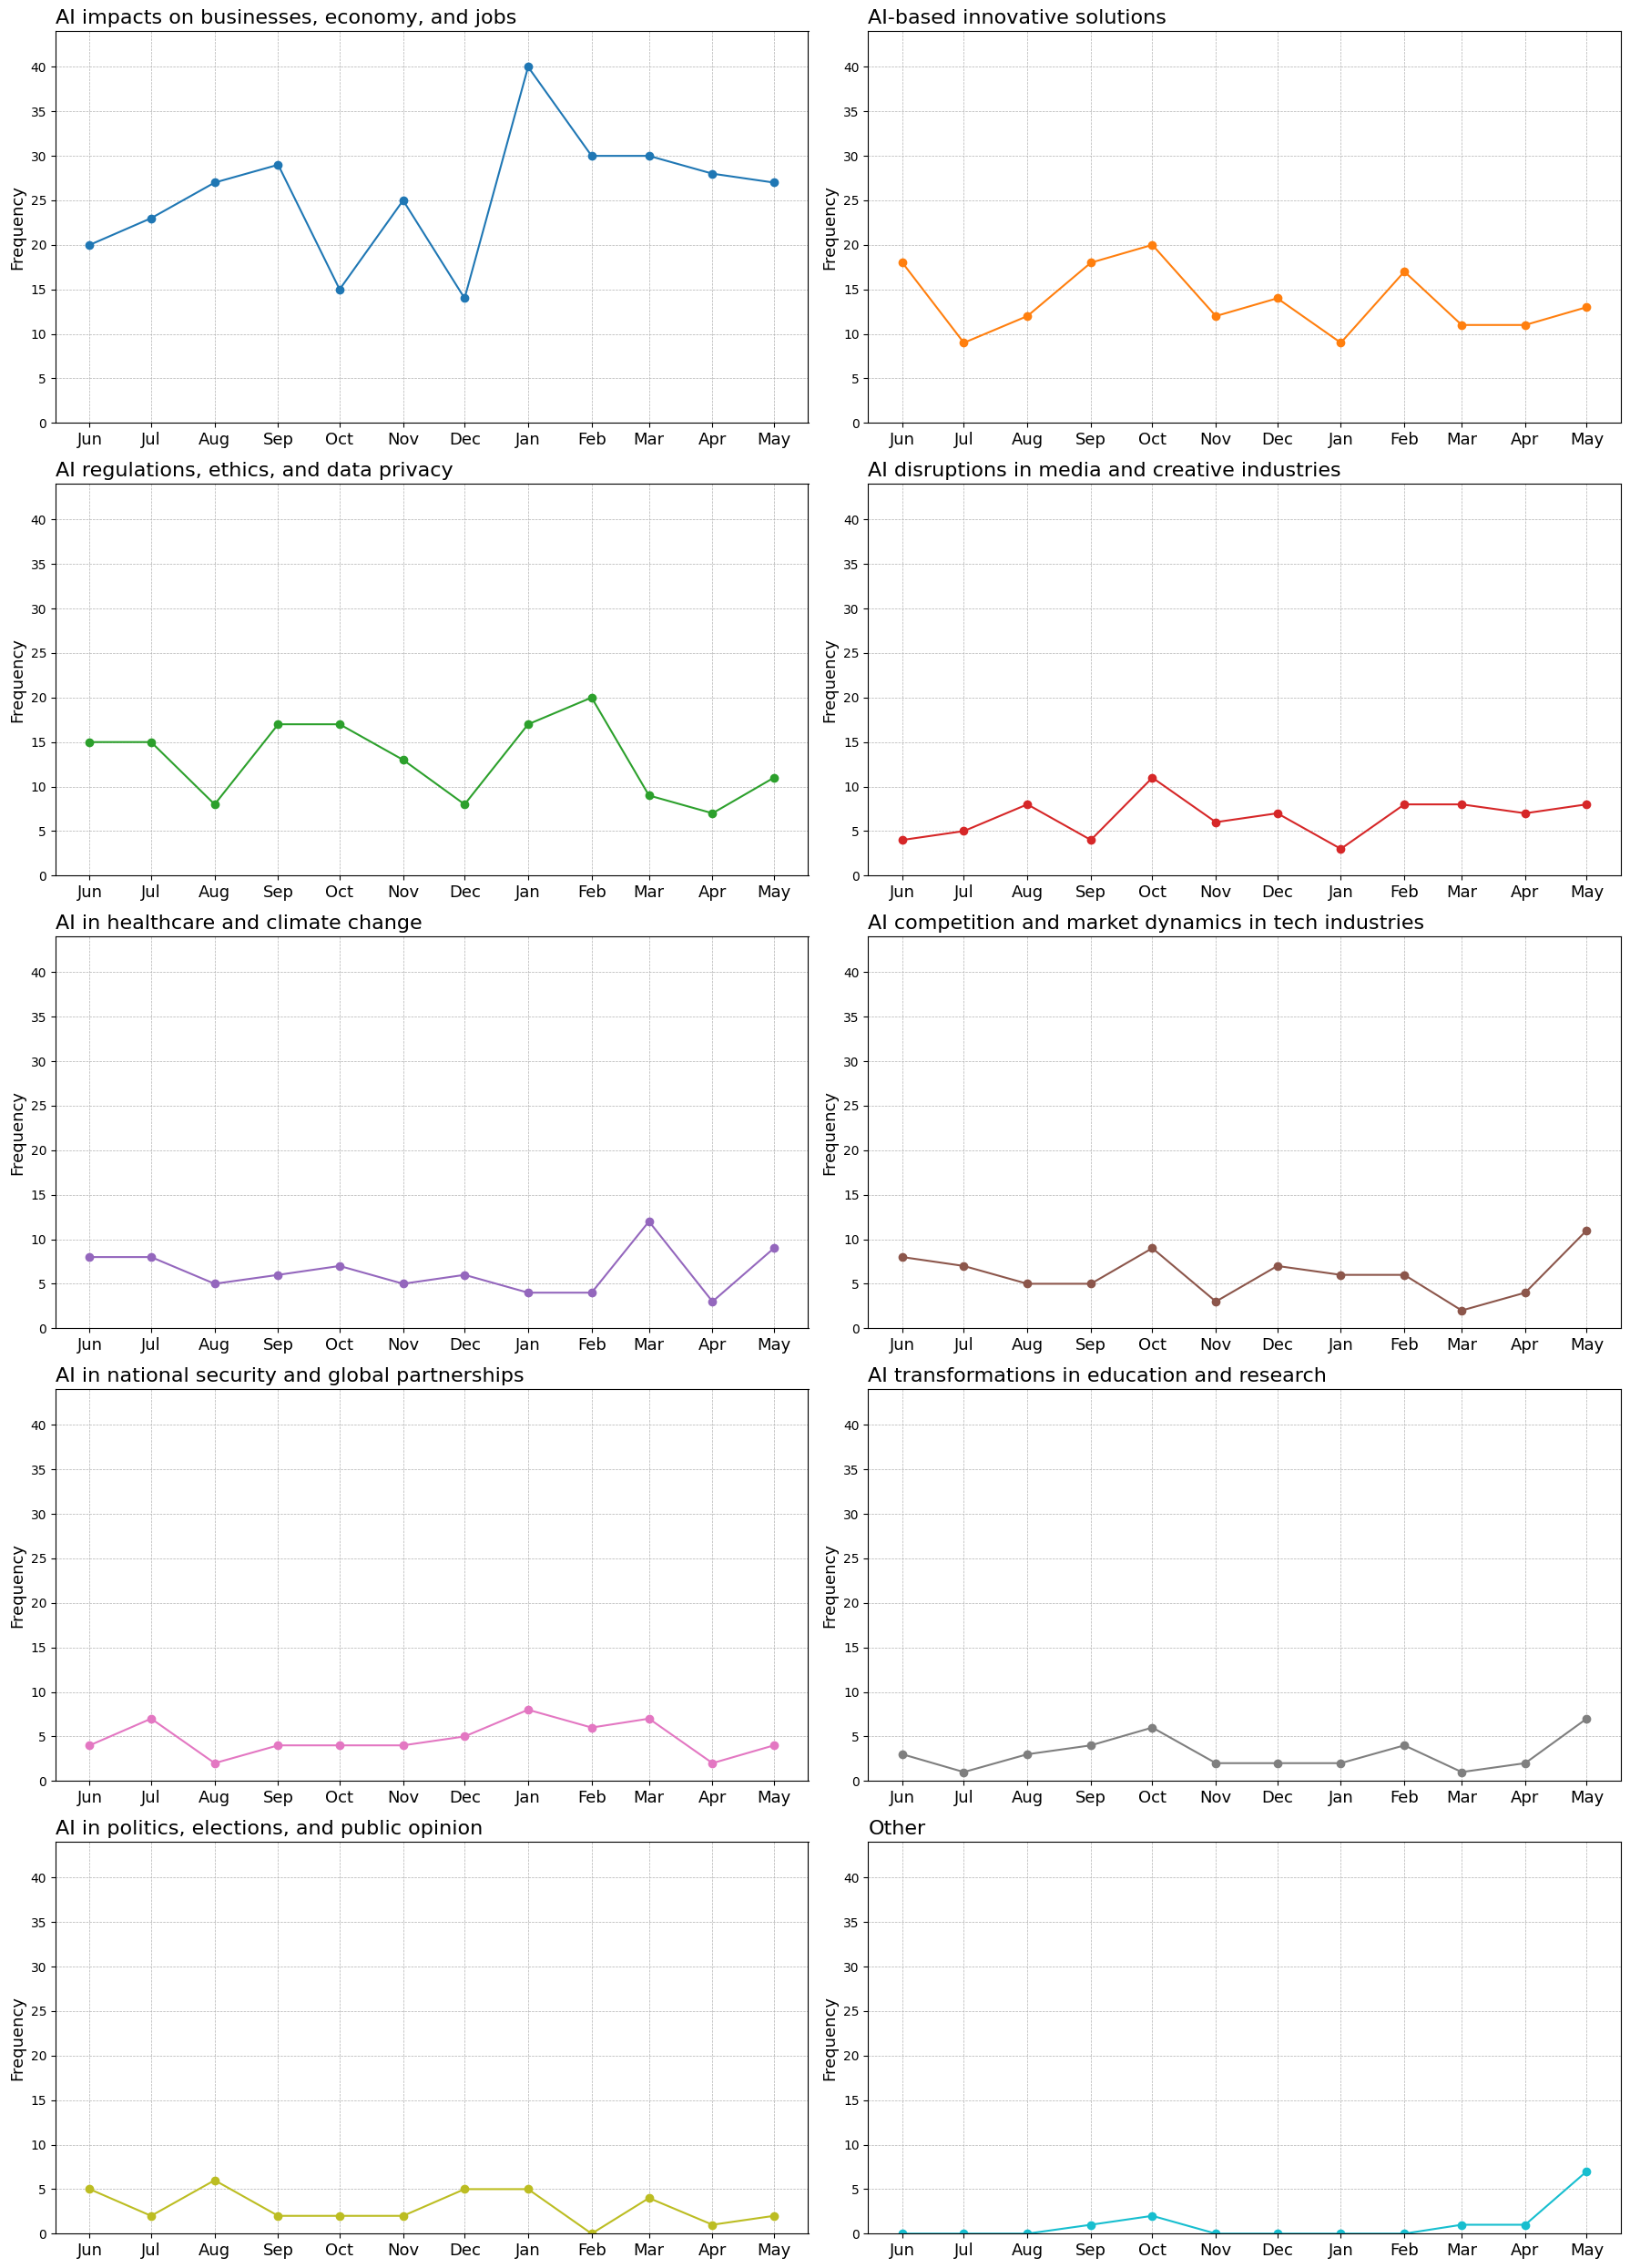

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_frame_frequencies_over_time_subplots_single_country(df: pd.DataFrame, country_name: str, top: int = None, colors=None):
    """
    Plots the frequency of frames over time for a single country in separate subplots,
    aggregated by month, with consistent y-axis scale.

    Args:
        df: A pandas DataFrame for a single country, with 'publish_date' and 'frame' columns.
        country_name: The name of the country for the plot titles.
        top: The number of top frequent frames to plot. If None, all frames are plotted.
        colors: A list of colors for each frame's line (optional).
    """
    # Convert 'publish_date' to datetime objects
    df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

    # Drop rows with invalid dates or missing frame information
    df_cleaned = df.dropna(subset=['publish_date', 'frame'])

    if df_cleaned.empty:
        print(f"No data available for {country_name} to plot frame frequencies over time.")
        return

    # Group by month and frame, and count the occurrences
    frame_counts_over_time = df_cleaned.groupby([df_cleaned['publish_date'].dt.to_period('M'), 'frame']).size().unstack(fill_value=0)

    # Convert the PeriodIndex to datetime for plotting
    frame_counts_over_time.index = frame_counts_over_time.index.to_timestamp()

    # Determine the frames to plot (top N or all)
    frames_to_plot = frame_counts_over_time.columns.tolist()
    if top is not None:
        # Calculate total counts for each frame to get top N
        total_frame_counts = df_cleaned['frame'].value_counts()
        top_frames = total_frame_counts.nlargest(top).index.tolist()
        frames_to_plot = [frame for frame in top_frames if frame in frames_to_plot] # Ensure top frames exist in the monthly counts


    if not frames_to_plot:
        print(f"No data available for the specified frames in {country_name} to plot frame frequencies over time.")
        return

    # Determine the number of rows and columns for subplots
    n_frames = len(frames_to_plot)
    n_cols = 2  # You can adjust the number of columns for subplots
    n_rows = (n_frames + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Determine the overall maximum frequency for consistent y-axis scale
    max_freq = frame_counts_over_time[frames_to_plot].values.max() if not frame_counts_over_time[frames_to_plot].empty else 0

    for i, frame_name in enumerate(frames_to_plot):
        ax = axes[i]

        if frame_name in frame_counts_over_time.columns:
             color = colors[i] if colors and i < len(colors) else None
             ax.plot(frame_counts_over_time.index, frame_counts_over_time[frame_name], marker='o', linestyle='-', color=color)

             ax.set_ylabel('Frequency', fontsize=13)
             ax.set_title(f'{frame_name}', loc='left', fontsize=16)
             ax.grid(True, which='both', linestyle='--', linewidth=0.5)

             # Set the same y-axis limit for all subplots
             ax.set_ylim(0, max_freq * 1.1) # Add a small buffer to the max frequency

             # Format the x-axis to show abbreviated month names
             ax.xaxis.set_major_locator(mdates.MonthLocator())
             ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
             plt.setp(ax.get_xticklabels(), rotation=0, fontsize=13) # Rotate labels for better visibility

        else:
             ax.set_title(f'{frame_name} in {country_name} - No data available', loc='left')
             ax.set_visible(True) # Ensure the empty subplot is still displayed


    # Hide any unused subplots
    for j in range(n_frames, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage (replace with the actual dataframe and country name you want to use):
# Assuming you have a dataframe named 'uk_df' for the UK
# plot_frame_frequencies_over_time_subplots_single_country(uk_df, 'UK')

country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

# For example using the UK data already loaded:
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')
df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plot_frame_frequencies_over_time_subplots_single_country(df, 'UK', 10, colors)

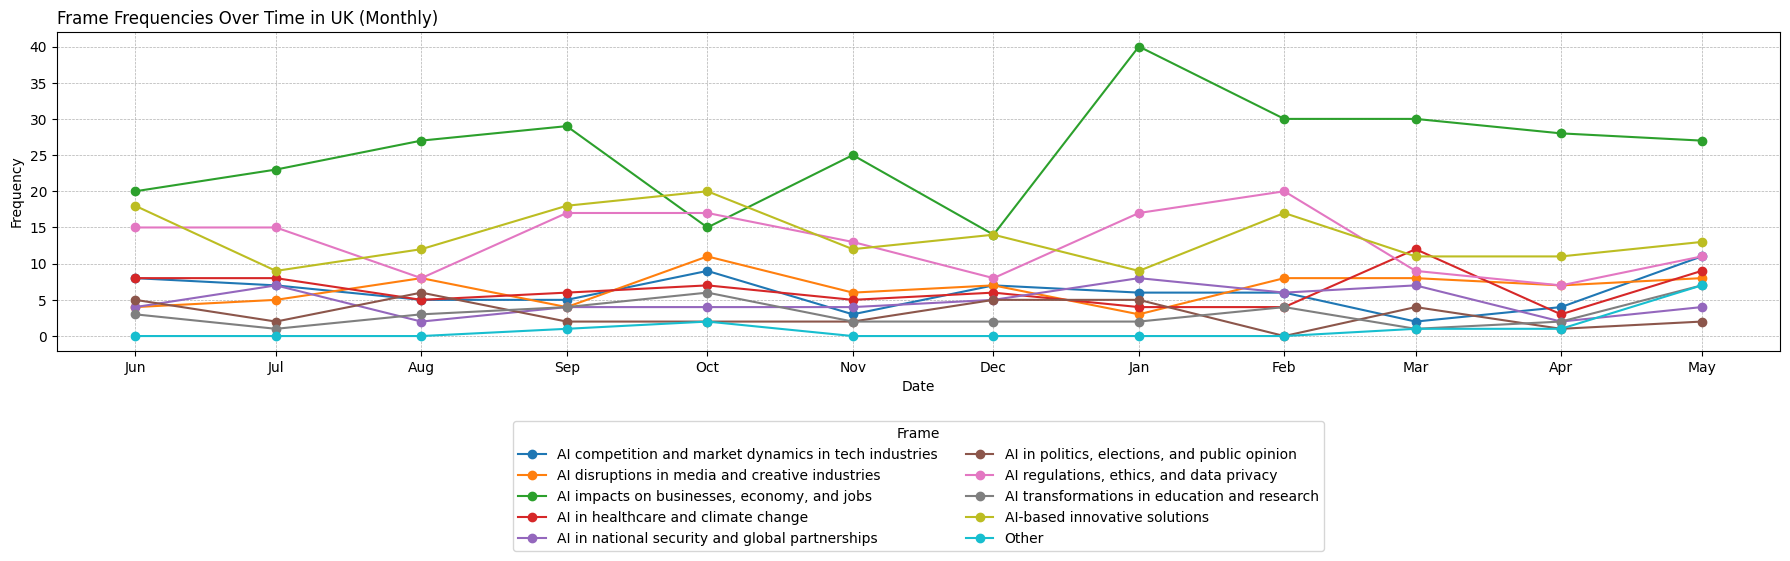

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_frame_frequencies_over_time_single_country(df: pd.DataFrame, country_name: str):
    """
    Plots the frequency of frames over time for a single country, aggregated by month.

    Args:
        df: A pandas DataFrame for a single country, with 'publish_date' and 'frame' columns.
        country_name: The name of the country for the plot title.
    """
    # Convert 'publish_date' to datetime objects
    df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

    # Drop rows with invalid dates or missing frame information
    df_cleaned = df.dropna(subset=['publish_date', 'frame'])

    if df_cleaned.empty:
        print(f"No data available for {country_name} to plot frame frequencies over time.")
        return

    # Group by month and frame, and count the occurrences
    frame_counts_over_time = df_cleaned.groupby([df_cleaned['publish_date'].dt.to_period('M'), 'frame']).size().unstack(fill_value=0)

    # Convert the PeriodIndex to datetime for plotting
    frame_counts_over_time.index = frame_counts_over_time.index.to_timestamp()

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 6))

    # Plot each frame's frequency over time
    for frame in frame_counts_over_time.columns:
        ax.plot(frame_counts_over_time.index, frame_counts_over_time[frame], marker='o', linestyle='-', label=frame)

    # Add labels, title, and grid
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frame Frequencies Over Time in {country_name} (Monthly)', loc='left')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(title='Frame', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

    # Format the x-axis to show abbreviated month names
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xticks() # Rotate labels for better visibility


    plt.tight_layout()
    plt.show()

# Example usage (replace with the actual dataframe and country name you want to use):
# Assuming you have a dataframe named 'uk_df' for the UK
# plot_frame_frequencies_over_time_single_country(uk_df, 'UK')

# For example using the UK data already loaded:
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')
df["frame"] = df["frame"].apply(extract_clean_frame)
plot_frame_frequencies_over_time_single_country(df, 'UK')

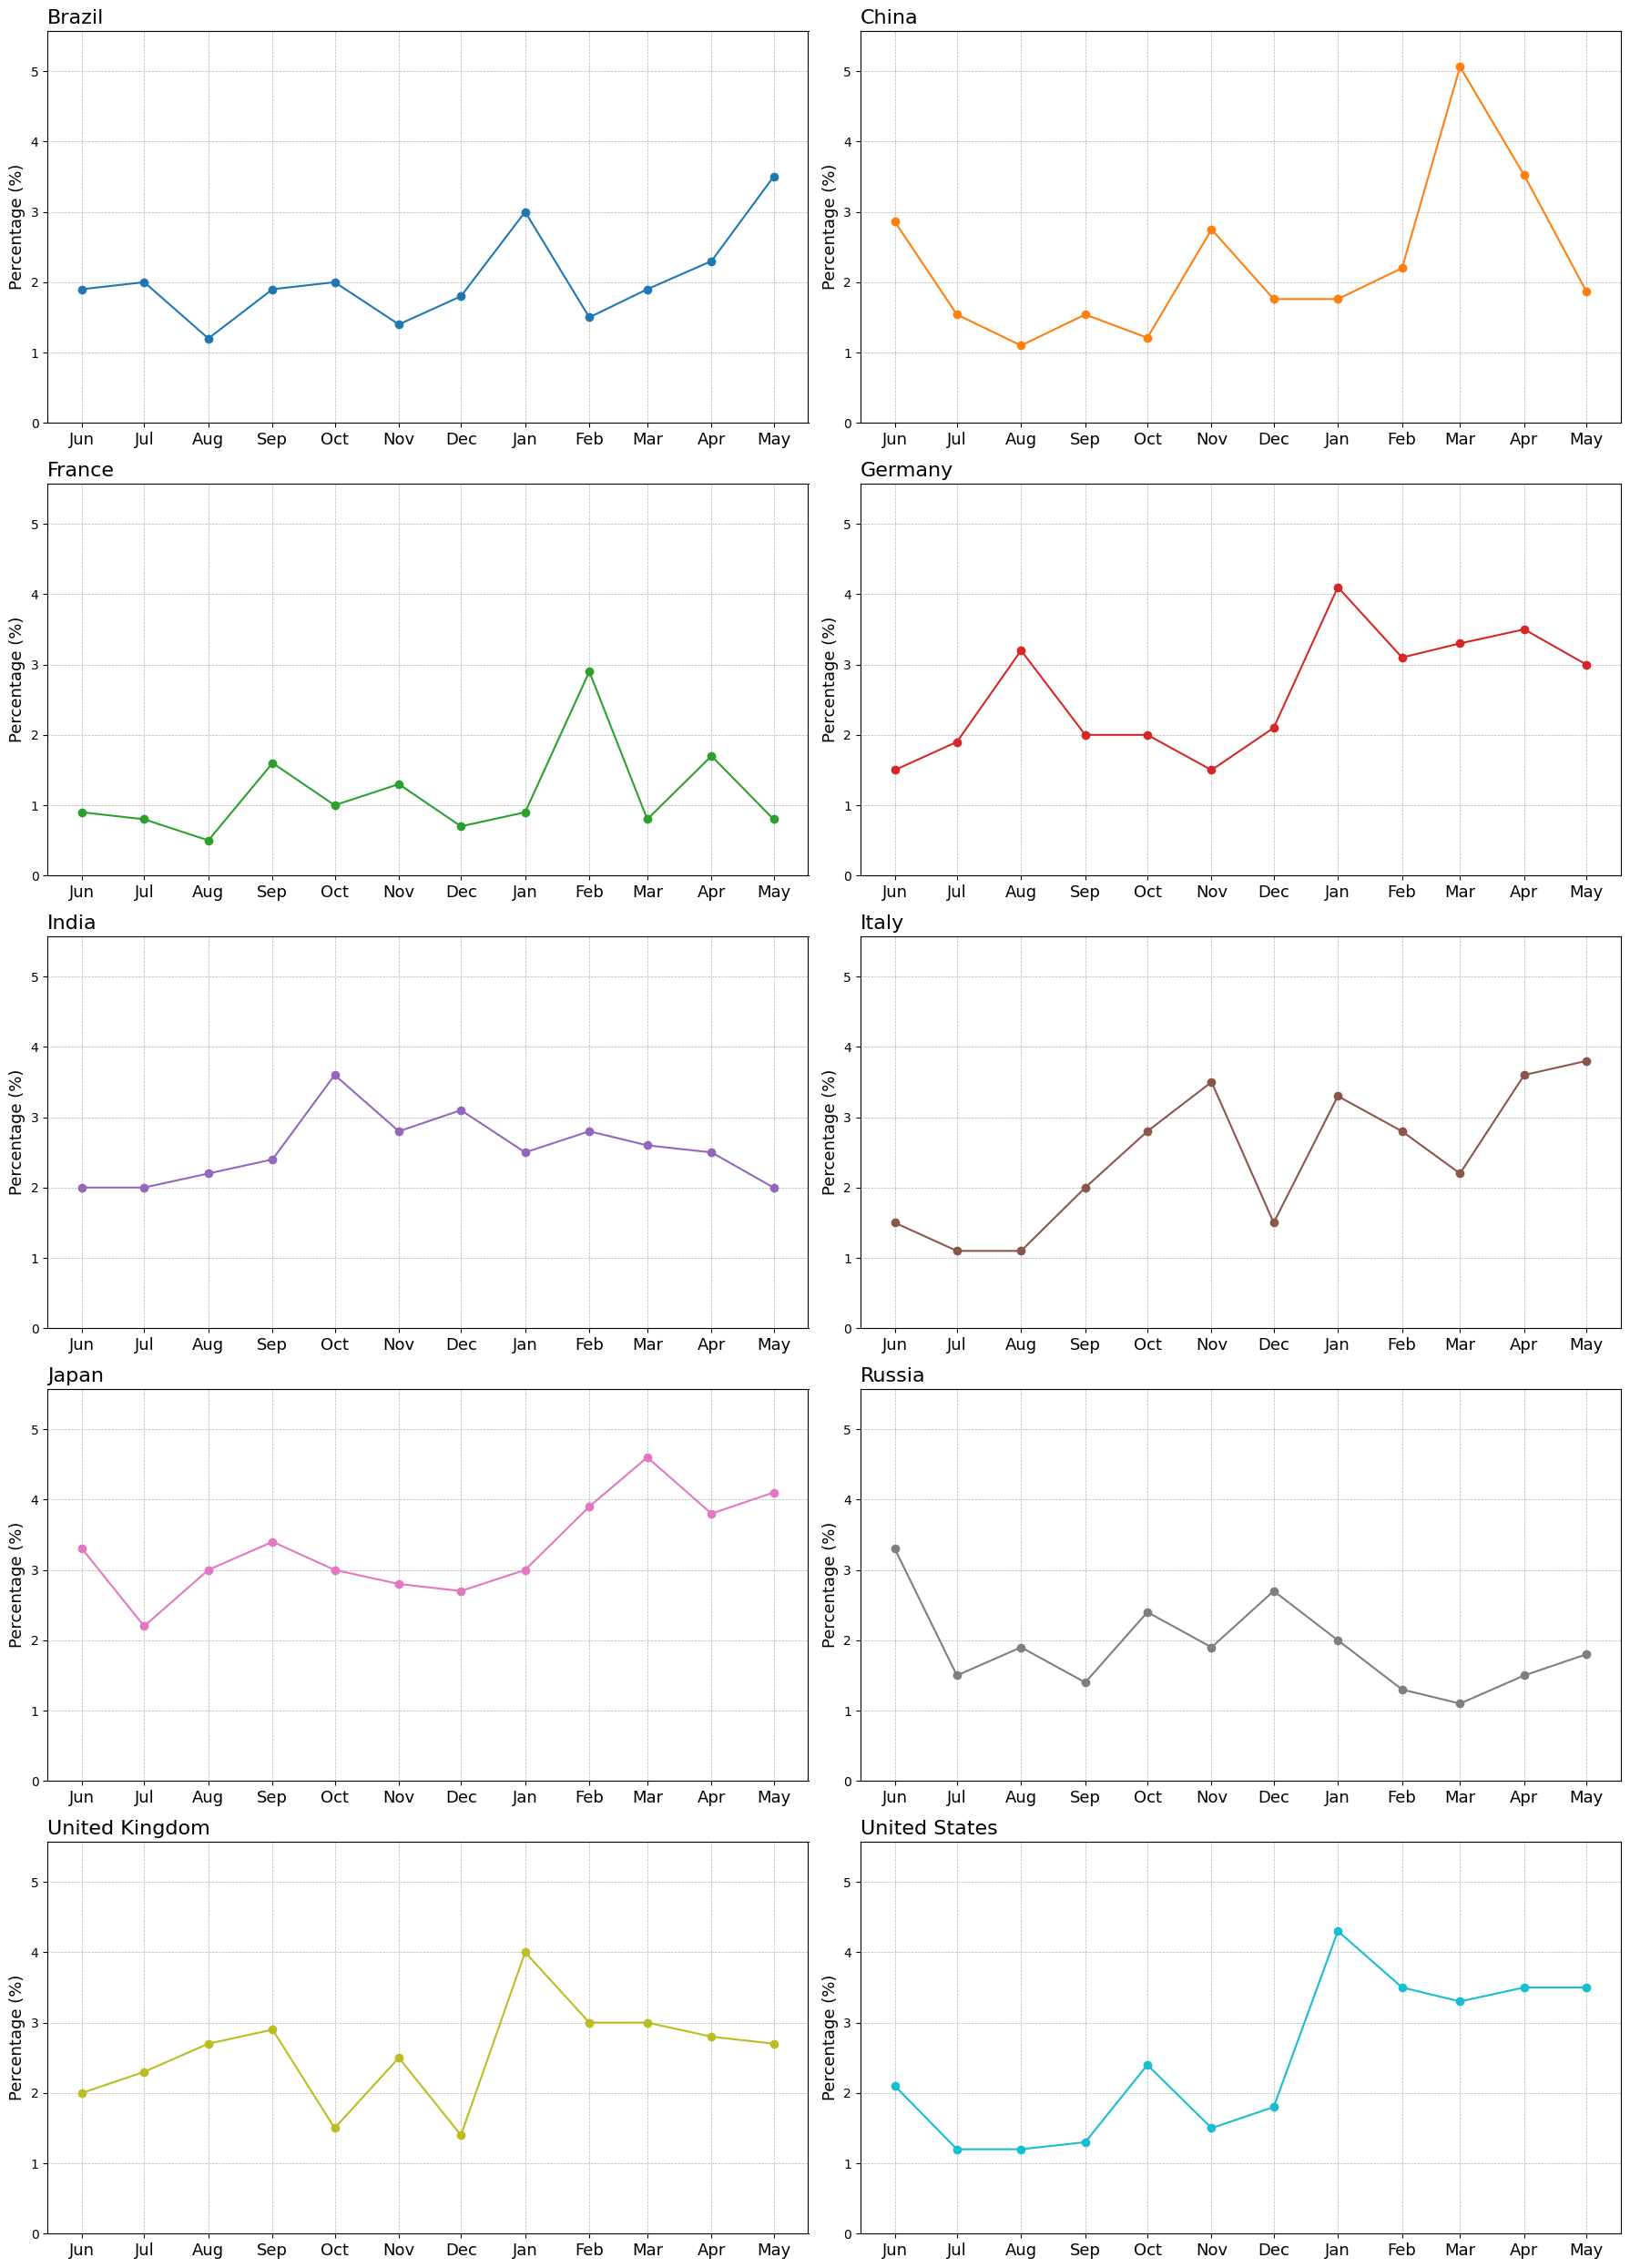

Brazil publish_date
2024-06-01    1.9
2024-07-01    2.0
2024-08-01    1.2
2024-09-01    1.9
2024-10-01    2.0
2024-11-01    1.4
2024-12-01    1.8
2025-01-01    3.0
2025-02-01    1.5
2025-03-01    1.9
2025-04-01    2.3
2025-05-01    3.5
Freq: MS, dtype: float64
China publish_date
2024-06-01    2.860286
2024-07-01    1.540154
2024-08-01    1.100110
2024-09-01    1.540154
2024-10-01    1.210121
2024-11-01    2.750275
2024-12-01    1.760176
2025-01-01    1.760176
2025-02-01    2.200220
2025-03-01    5.060506
2025-04-01    3.520352
2025-05-01    1.870187
Freq: MS, dtype: float64
France publish_date
2024-06-01    0.9
2024-07-01    0.8
2024-08-01    0.5
2024-09-01    1.6
2024-10-01    1.0
2024-11-01    1.3
2024-12-01    0.7
2025-01-01    0.9
2025-02-01    2.9
2025-03-01    0.8
2025-04-01    1.7
2025-05-01    0.8
Freq: MS, dtype: float64
Germany publish_date
2024-06-01    1.5
2024-07-01    1.9
2024-08-01    3.2
2024-09-01    2.0
2024-10-01    2.0
2024-11-01    1.5
2024-12-01    2.1
2025-01-01 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_frame_frequency_over_time_by_country_subplots(country_dfs, country_names, frame_name, colors=None):
    """
    Plots the frequency of a specific frame over time for different countries in separate subplots,
    aggregated by month, as a percentage of the total rows for each country, with consistent y-axis scale.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with 'publish_date' and 'frame' columns.
        country_names: A list of strings, the names of the countries.
        frame_name: A string, the name of the frame to plot.
        colors: A list of colors for each country's line (optional).
    """
    n_countries = len(country_dfs)
    n_cols = 2  # You can adjust the number of columns for subplots
    n_rows = (n_countries + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Determine the overall maximum percentage for the specified frame across all countries
    max_percentage = 0
    for df in country_dfs:
        # Convert 'publish_date' to datetime objects and 'frame' to string for processing
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
        df['frame'] = df['frame'].astype(str)

        # Drop rows with invalid dates or missing frame information
        df_cleaned = df.dropna(subset=['publish_date', 'frame'])

        if not df_cleaned.empty:
            total_count = df_cleaned.shape[0]
            if total_count > 0:
                # Filter for the specific frame
                df_frame = df_cleaned[df_cleaned['frame'] == frame_name]
                if not df_frame.empty:
                  # Group by month and count the occurrences
                  frame_counts_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M')).size()
                  # Calculate percentages
                  frame_percentages_over_time_monthly = (frame_counts_over_time_monthly / total_count) * 100
                  max_percentage = max(max_percentage, frame_percentages_over_time_monthly.max())


    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Ensure frame column is string
        df['frame'] = df['frame'].astype(str)

        # Drop rows with invalid dates or missing frame information
        df_cleaned = df.dropna(subset=['publish_date', 'frame'])


        if not df_cleaned.empty:
            total_count = df_cleaned.shape[0]
            if total_count > 0:
              # Filter for the specific frame
              df_frame = df_cleaned[df_cleaned['frame'] == frame_name]

              if not df_frame.empty:
                  # Group by month and count the occurrences
                  frame_counts_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M')).size()

                  # Calculate percentages
                  frame_percentages_over_time_monthly = (frame_counts_over_time_monthly / total_count) * 100

                  # Convert the PeriodIndex to datetime for plotting
                  frame_percentages_over_time_monthly.index = frame_percentages_over_time_monthly.index.to_timestamp()

                  # Plot the monthly percentage for the current country
                  color = colors[i] if colors and i < len(colors) else None
                  ax.plot(frame_percentages_over_time_monthly.index, frame_percentages_over_time_monthly.values, marker='o', linestyle='-', label=country_names[i], color=color)

                  ax.set_ylabel('Percentage (%)', fontsize=13)
                  ax.set_title(f'{country_name}', loc='left', fontsize=16)
                  ax.grid(True, which='both', linestyle='--', linewidth=0.5)

                  # Set the same y-axis limit for all subplots
                  ax.set_ylim(0, max_percentage * 1.1) # Add a small buffer to the max percentage

                  # Format the x-axis to show abbreviated month names
                  ax.xaxis.set_major_locator(mdates.MonthLocator())
                  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
                  plt.setp(ax.get_xticklabels(), rotation=0, fontsize=13) # Rotate labels for better visibility

              else:
                  ax.set_title(f'{country_name} - No data available for frame: "{frame_name}"', loc='left')
                  ax.set_visible(True) # Ensure the empty subplot is still displayed
            else:
              ax.set_title(f'{country_name} - No data available', loc='left')
              ax.set_visible(True) # Ensure the empty subplot is still displayed

        else:
            ax.set_title(f'{country_name} - No data available', loc='left')
            ax.set_visible(True) # Ensure the empty subplot is still displayed


    # Hide any unused subplots
    for j in range(n_countries, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Ensure frame column is string
        df['frame'] = df['frame'].astype(str)

        # Drop rows with invalid dates or missing frame information
        df_cleaned = df.dropna(subset=['publish_date', 'frame'])


        if not df_cleaned.empty:
            total_count = df_cleaned.shape[0]
            if total_count > 0:
              # Filter for the specific frame
              df_frame = df_cleaned[df_cleaned['frame'] == frame_name]

              if not df_frame.empty:
                  # Group by month and count the occurrences
                  frame_counts_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M')).size()

                  # Calculate percentages
                  frame_percentages_over_time_monthly = (frame_counts_over_time_monthly / total_count) * 100

                  # Convert the PeriodIndex to datetime for plotting
                  frame_percentages_over_time_monthly.index = frame_percentages_over_time_monthly.index.to_timestamp()
                  print(country_name, frame_percentages_over_time_monthly)

# Example usage:
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Example of how to use the new function (replace 'Your Frame Name' with the actual frame name)
plot_frame_frequency_over_time_by_country_subplots(country_dfs, country_names, 'AI impacts on businesses, economy, and jobs', colors)

#AI impacts on businesses, economy, and jobs
#AI-based innovative solutions
#AI regulations, ethics, and data privacy
#AI in national security and global partnerships
#AI competition and market dynamics in tech industries
#AI disruptions in media and creative industries
#AI transformations in education and research
#AI in healthcare and climate change
#AI in politics, elections, and public opinion
#Other

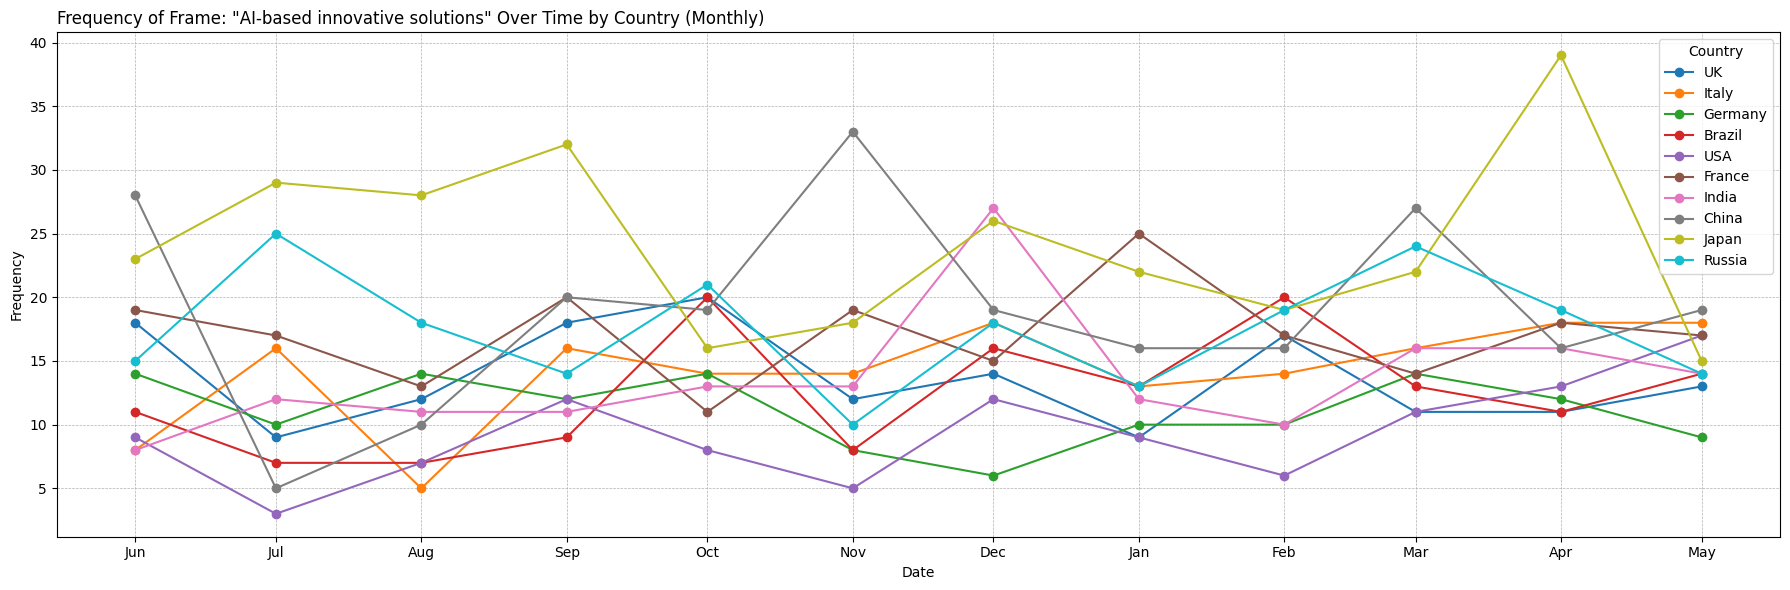

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_frame_frequency_over_time_by_country(country_dfs, country_names, frame_name, colors=None):
    """
    Plots the frequency of a specific frame over time, comparing different countries,
    aggregated by month.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with 'publish_date' and 'frame' columns.
        country_names: A list of strings, the names of the countries.
        frame_name: A string, the name of the frame to plot.
        colors: A list of colors for each country's line (optional).
    """
    fig, ax = plt.subplots(figsize=(18, 6))

    for i, df in enumerate(country_dfs):
        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Filter for the specific frame and drop rows with invalid dates
        df_frame = df[df['frame'] == frame_name].dropna(subset=['publish_date'])

        if not df_frame.empty:
            # Group by month and count the occurrences
            frame_counts_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M')).size()

            # Convert the PeriodIndex to datetime for plotting
            frame_counts_over_time_monthly.index = frame_counts_over_time_monthly.index.to_timestamp()

            # Plot the monthly frequency for the current country
            color = colors[i] if colors and i < len(colors) else None
            ax.plot(frame_counts_over_time_monthly.index, frame_counts_over_time_monthly.values, marker='o', linestyle='-', label=country_names[i], color=color)
        else:
            print(f"No data found for frame '{frame_name}' in {country_names[i]}")


    # Add labels, title, and grid
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of Frame: "{frame_name}" Over Time by Country (Monthly)', loc='left')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(title='Country')

    # Format the x-axis to show abbreviated month names
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xticks() # Rotate labels for better visibility


    plt.tight_layout()
    plt.show()

# Example usage with your dataframes:
country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
]

country_names = ['UK', 'Italy', 'Germany', 'Brazil', 'USA', 'France', 'India', 'China', 'Japan', 'Russia']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)


# Example of how to use the new function (replace 'Your Frame Name' with the actual frame name)
plot_frame_frequency_over_time_by_country(country_dfs, country_names, 'AI-based innovative solutions')

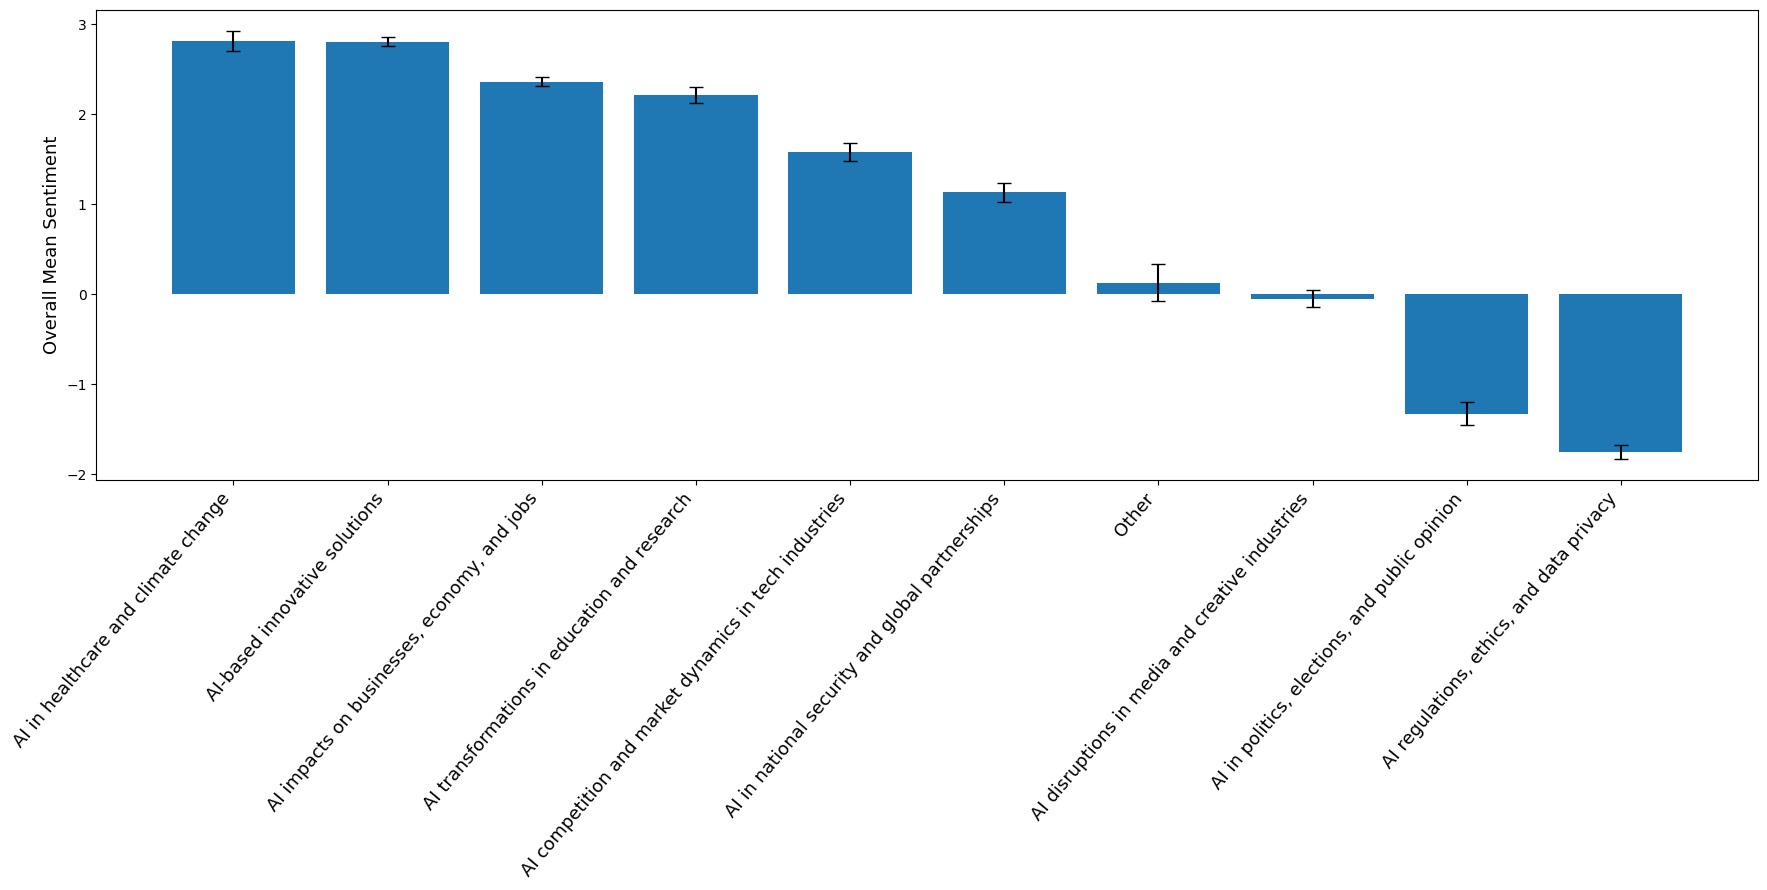

                                               frame      mean       sem
3                AI in healthcare and climate change  2.811676  0.107217
8                      AI-based innovative solutions  2.806150  0.045484
2        AI impacts on businesses, economy, and jobs  2.361171  0.050920
7       AI transformations in education and research  2.211189  0.091103
0  AI competition and market dynamics in tech ind...  1.577947  0.098371
4    AI in national security and global partnerships  1.131677  0.104576
9                                              Other  0.128571  0.204734
1    AI disruptions in media and creative industries -0.047809  0.093443
5      AI in politics, elections, and public opinion -1.325397  0.126737
6           AI regulations, ethics, and data privacy -1.746467  0.078425


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_overall_mean_sentiment_by_frame(country_dfs, frame_names, colors=None):
    """
    Calculates and plots the overall mean sentiment for each frame across all countries,
    including error bars representing the standard error of the mean, sorted by mean sentiment.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        frame_names: A list of strings, the names of the frames.
        colors: A list of colors for each frame's bar (optional).
    """
    # Concatenate all dataframes into a single dataframe and process sentiment
    all_data = pd.concat(country_dfs, ignore_index=True)
    all_data['sentiment'] = pd.to_numeric(all_data['sentiment'], errors='coerce')
    all_data_cleaned = all_data.dropna(subset=['sentiment', 'frame'])

    if all_data_cleaned.empty:
        print("No valid sentiment data available to plot overall mean sentiment by frame.")
        return

    # Calculate mean sentiment and standard error for each frame
    frame_sentiment_summary = all_data_cleaned.groupby('frame')['sentiment'].agg(['mean', 'sem']).reset_index()

    # Sort by mean sentiment
    frame_sentiment_summary_sorted = frame_sentiment_summary.sort_values(by='mean', ascending=False)

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 9))

    # Get colors for the sorted frames
    if colors and len(colors) >= len(frame_sentiment_summary_sorted):
        # Create a dictionary to map frame names to colors (you might need to define colors for frames)
        # For simplicity here, we'll just use the provided colors sequentially if available and sufficient
        sorted_colors = colors[:len(frame_sentiment_summary_sorted)]
    else:
        sorted_colors = None # Use default matplotlib colors

    # Plot the bars with error bars
    ax.bar(frame_sentiment_summary_sorted['frame'], frame_sentiment_summary_sorted['mean'],
           yerr=frame_sentiment_summary_sorted['sem'], capsize=5, # Add error bars with capsize
           color=sorted_colors)

    # Add labels and title
    ax.set_ylabel('Overall Mean Sentiment', fontsize=13)
    plt.xticks(rotation=50, ha='right', fontsize=13) # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()
    print(frame_sentiment_summary_sorted)

# Example usage with your dataframes and frame names:
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

# Assuming 'known_frames' is available in the notebook's global scope
# If not, you would need to define it here or pass it to the function
frame_names = known_frames # Using the list of known frames

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plot_overall_mean_sentiment_by_frame(country_dfs, frame_names)

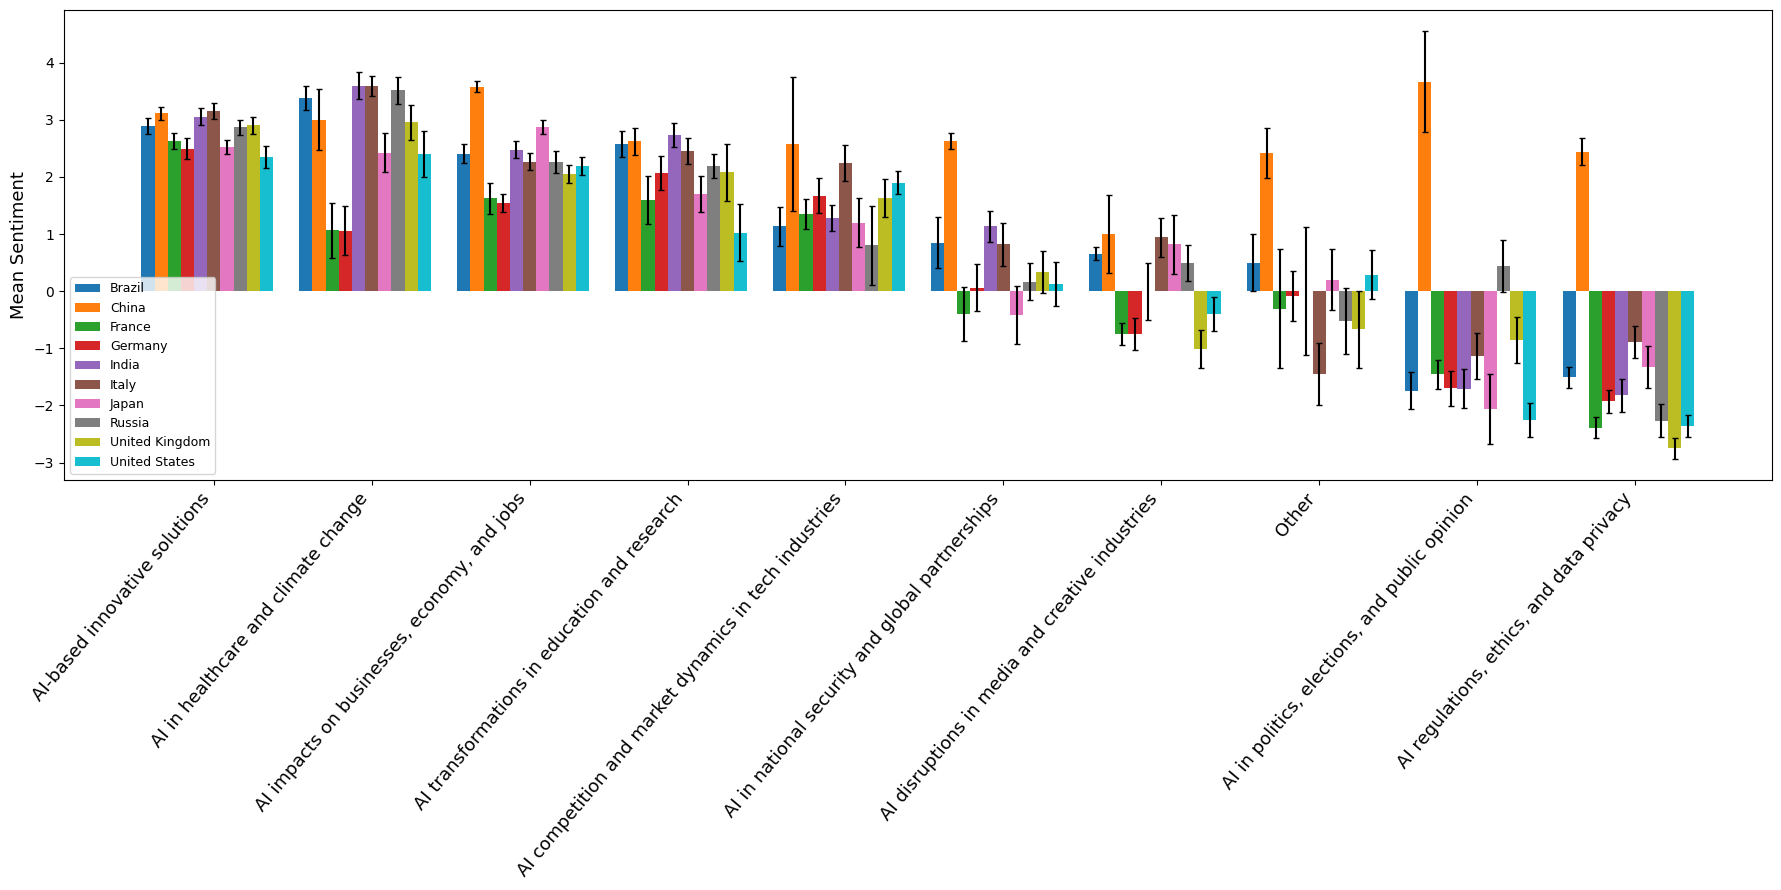

Brazil mean sentiment [np.float64(2.8843537414965987), np.float64(3.388888888888889), np.float64(2.4066390041493775), np.float64(2.5757575757575757), np.float64(1.1343283582089552), np.float64(0.85), np.float64(0.6578947368421053), np.float64(0.5), np.float64(-1.74), np.float64(-1.5108695652173914)] sem [np.float64(0.14105748584858674), np.float64(0.21186165663476772), np.float64(0.1634976756126182), np.float64(0.23261020754249628), np.float64(0.33686204753866256), np.float64(0.4494298382252557), np.float64(0.11994583968531737), np.float64(0.5), np.float64(0.32926634588219345), np.float64(0.18608474440413283)]
China mean sentiment [np.float64(3.1184210526315788), np.float64(3.0), np.float64(3.582995951417004), np.float64(2.6226415094339623), np.float64(2.5714285714285716), np.float64(2.62453531598513), np.float64(1.0), np.float64(2.411764705882353), np.float64(3.6666666666666665), np.float64(2.4444444444444446)] sem [np.float64(0.11359094457366072), np.float64(0.5310850045437944), np.f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_sentiment_by_frame_and_country(country_dfs, country_names, colors=None):
    """
    Plots the mean sentiment for each frame, comparing different countries,
    including the overall mean sentiment for each country and error bars.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's bars (optional).
    """
    processed_dfs = []
    for df in country_dfs:
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')
        processed_dfs.append(df.dropna(subset=['sentiment']))

    # Calculate overall mean sentiment for each country
    overall_mean_sentiments = [df['sentiment'].mean() for df in processed_dfs]

    # Get the unique frames from all dataframes
    all_frames = set()
    for df in processed_dfs:
        all_frames.update(df['frame'].unique())

    # Create a dictionary to store the mean sentiment and standard error for each frame and country
    mean_sentiments = {frame: [] for frame in all_frames}
    sentiment_errors = {frame: [] for frame in all_frames}

    # Populate the dictionaries with the mean sentiments and standard errors for each frame
    for df in processed_dfs:
        for frame in all_frames:
            frame_sentiment_data = df[df['frame'] == frame]['sentiment'].dropna()
            mean_sentiments[frame].append(frame_sentiment_data.mean() if not frame_sentiment_data.empty else np.nan)
            sentiment_errors[frame].append(frame_sentiment_data.sem() if not frame_sentiment_data.empty else np.nan)


    # Calculate the overall mean sentiment for each frame
    overall_frame_mean_sentiments = {frame: np.nanmean([mean_sentiments[frame][i] for i in range(len(country_names))]) for frame in all_frames}

    # Sort the frames by their overall mean sentiment
    all_frames_sorted = sorted(overall_frame_mean_sentiments, key=overall_frame_mean_sentiments.get, reverse=True)

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 9))
    x = np.arange(len(all_frames_sorted))
    width = 0.1
    gap = 0.2 # Define the gap between groups of bars

    # Plot the bars for each country with error bars
    for i, country_name in enumerate(country_names):
        means = [mean_sentiments[frame][i] for frame in all_frames_sorted]
        errors = [sentiment_errors[frame][i] if not np.isnan(sentiment_errors[frame][i]) else np.nan for frame in all_frames_sorted] # Fixed indexing here
        color = colors[i] if colors and i < len(colors) else None
        # Adjust the x-position to include the gap
        ax.bar(x + i * width + x * gap, means, width, yerr=errors, capsize=2, label=country_name, color=color)


    # Add horizontal lines for overall mean sentiment
    #for i, country_name in enumerate(country_names):
    #    color = colors[i] if colors and i < len(colors) else None
    #    ax.axhline(y=overall_mean_sentiments[i], color=color, linestyle='--', label=f'{country_name} Overall Mean')


    # Add labels, title, and legend
    ax.set_ylabel('Mean Sentiment', fontsize=13)
    # Adjust the x-ticks position to be in the center of each group
    ax.set_xticks(x + (len(country_names) - 1) * width / 2 + x * gap + width/2)
    ax.set_xticklabels(all_frames_sorted, rotation=50, ha='right', fontsize=13)
    ax.legend(loc='lower left', fontsize=9)

    plt.tight_layout()
    plt.show()

    for i, country_name in enumerate(country_names):
        means = [mean_sentiments[frame][i] for frame in all_frames_sorted]
        errors = [sentiment_errors[frame][i] if not np.isnan(sentiment_errors[frame][i]) else np.nan for frame in all_frames_sorted] # Fixed indexing here
        print(country_name,"mean sentiment", means, "sem", errors)


# List of dataframes and country names
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Plot the mean sentiment by frame and country
plot_mean_sentiment_by_frame_and_country(country_dfs, country_names, colors)

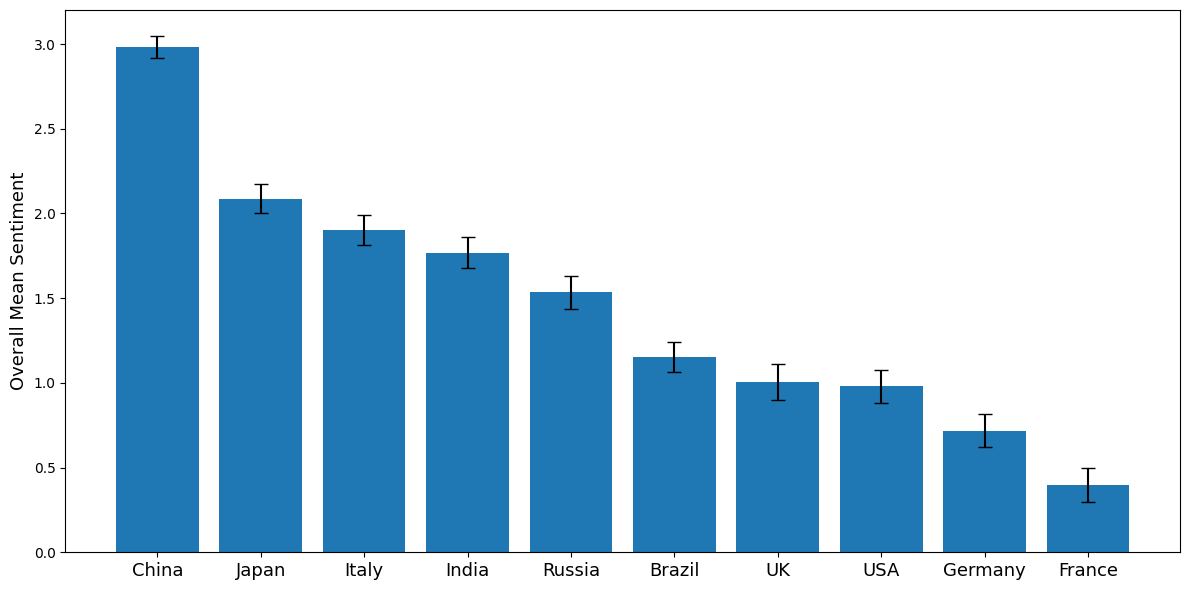

         mean_sentiment  sentiment_error
China          2.984598         0.064199
Japan          2.087000         0.085538
Italy          1.903000         0.088778
India          1.769000         0.091772
Russia         1.534000         0.096551
Brazil         1.152764         0.088674
UK             1.006012         0.104193
USA            0.979000         0.097530
Germany        0.718719         0.095442
France         0.397000         0.099987


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_overall_mean_sentiment_by_country(country_dfs, country_names, colors=None):
    """
    Plots the overall mean sentiment of each country as bars, sorted from highest to lowest,
    including error bars representing the standard error of the mean.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with a 'sentiment' column.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's bar (optional).
    """
    overall_mean_sentiments = []
    overall_sentiment_errors = []  # To store standard errors
    for df in country_dfs:
        # Convert 'sentiment' to numeric, coercing errors to NaN and drop NaNs
        sentiment_data = pd.to_numeric(df['sentiment'], errors='coerce').dropna()
        overall_mean_sentiments.append(sentiment_data.mean() if not sentiment_data.empty else np.nan)
        overall_sentiment_errors.append(sentiment_data.sem() if not sentiment_data.empty else np.nan) # Calculate standard error of the mean


    # Create a pandas DataFrame for easier sorting and plotting, including errors
    mean_sentiment_df = pd.DataFrame({
        'mean_sentiment': overall_mean_sentiments,
        'sentiment_error': overall_sentiment_errors
    }, index=country_names)

    # Drop countries with no valid sentiment data and sort by mean sentiment
    mean_sentiment_df_sorted = mean_sentiment_df.dropna(subset=['mean_sentiment']).sort_values(by='mean_sentiment', ascending=False)

    if mean_sentiment_df_sorted.empty:
        print("No valid sentiment data available to plot overall mean sentiment.")
        return

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Get colors for the sorted countries
    if colors and len(colors) == len(country_names):
        # Create a dictionary to map country names to colors
        color_map = dict(zip(country_names, colors))
        # Get colors in the order of the sorted countries
        sorted_colors = [color_map[country] for country in mean_sentiment_df_sorted.index]
    else:
        sorted_colors = None # Use default matplotlib colors

    # Plot the bars with error bars
    ax.bar(mean_sentiment_df_sorted.index, mean_sentiment_df_sorted['mean_sentiment'],
           yerr=mean_sentiment_df_sorted['sentiment_error'], capsize=5, # Add error bars with capsize
           color=sorted_colors)

    # Add labels and title
    ax.set_ylabel('Overall Mean Sentiment', fontsize=13)
    plt.xticks(fontsize=13) # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()
    print(mean_sentiment_df_sorted)

# Example usage:
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'UK', 'USA']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plot_overall_mean_sentiment_by_country(country_dfs, country_names)

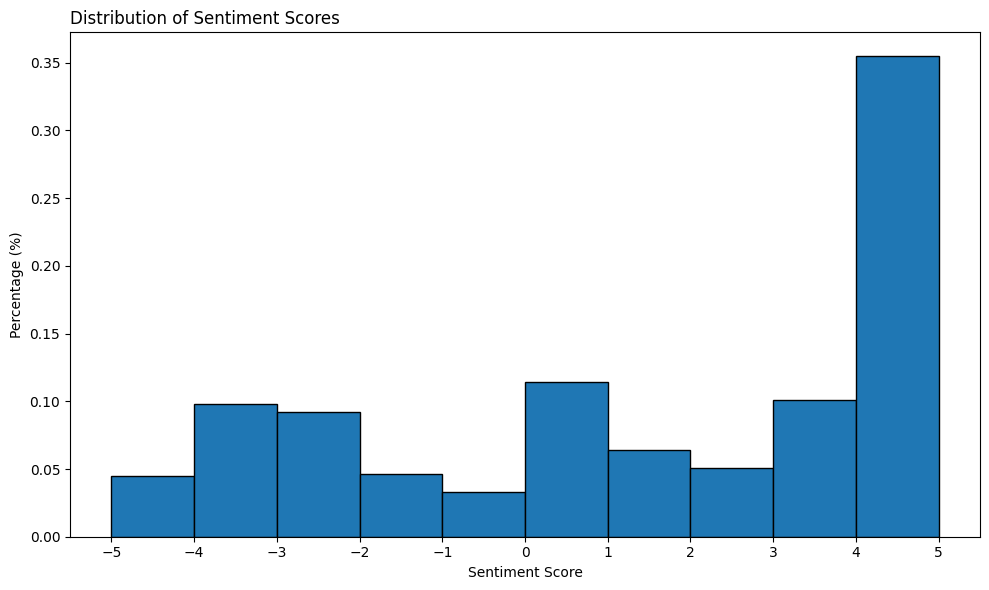

In [ ]:
def plot_sentiment_histogram(df: pd.DataFrame, sentiment_col: str = 'sentiment'):
    """
    Plots a histogram of the sentiment variable.

    Args:
        df: A pandas DataFrame with a sentiment column.
        sentiment_col: The name of the sentiment column (default is 'sentiment').
    """
    if sentiment_col not in df.columns:
        print(f"Error: Column '{sentiment_col}' not found in the DataFrame.")
        return

    # Convert sentiment column to numeric, coercing errors to NaN
    sentiment_data = pd.to_numeric(df[sentiment_col], errors='coerce').dropna()

    if sentiment_data.empty:
        print(f"No valid sentiment data available to plot histogram.")
        return

    fig, ax = plt.subplots(figsize=(10, 6))

    # Calculate percentages for the histogram
    weights = np.ones_like(sentiment_data) / len(sentiment_data)

    ax.hist(sentiment_data, bins=10, edgecolor='black', weights=weights) # Adjust bins as needed

    # Set x-axis ticks to unique sentiment values
    unique_sentiments = sorted(sentiment_data.unique())
    ax.set_xticks(unique_sentiments)

    ax.set_title('Distribution of Sentiment Scores', loc='left')
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Percentage (%)')
    # Remove the grid
    ax.grid(False)

    plt.tight_layout()
    plt.show()

df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')
df["frame"] = df["frame"].apply(extract_clean_frame)
plot_sentiment_histogram(df)

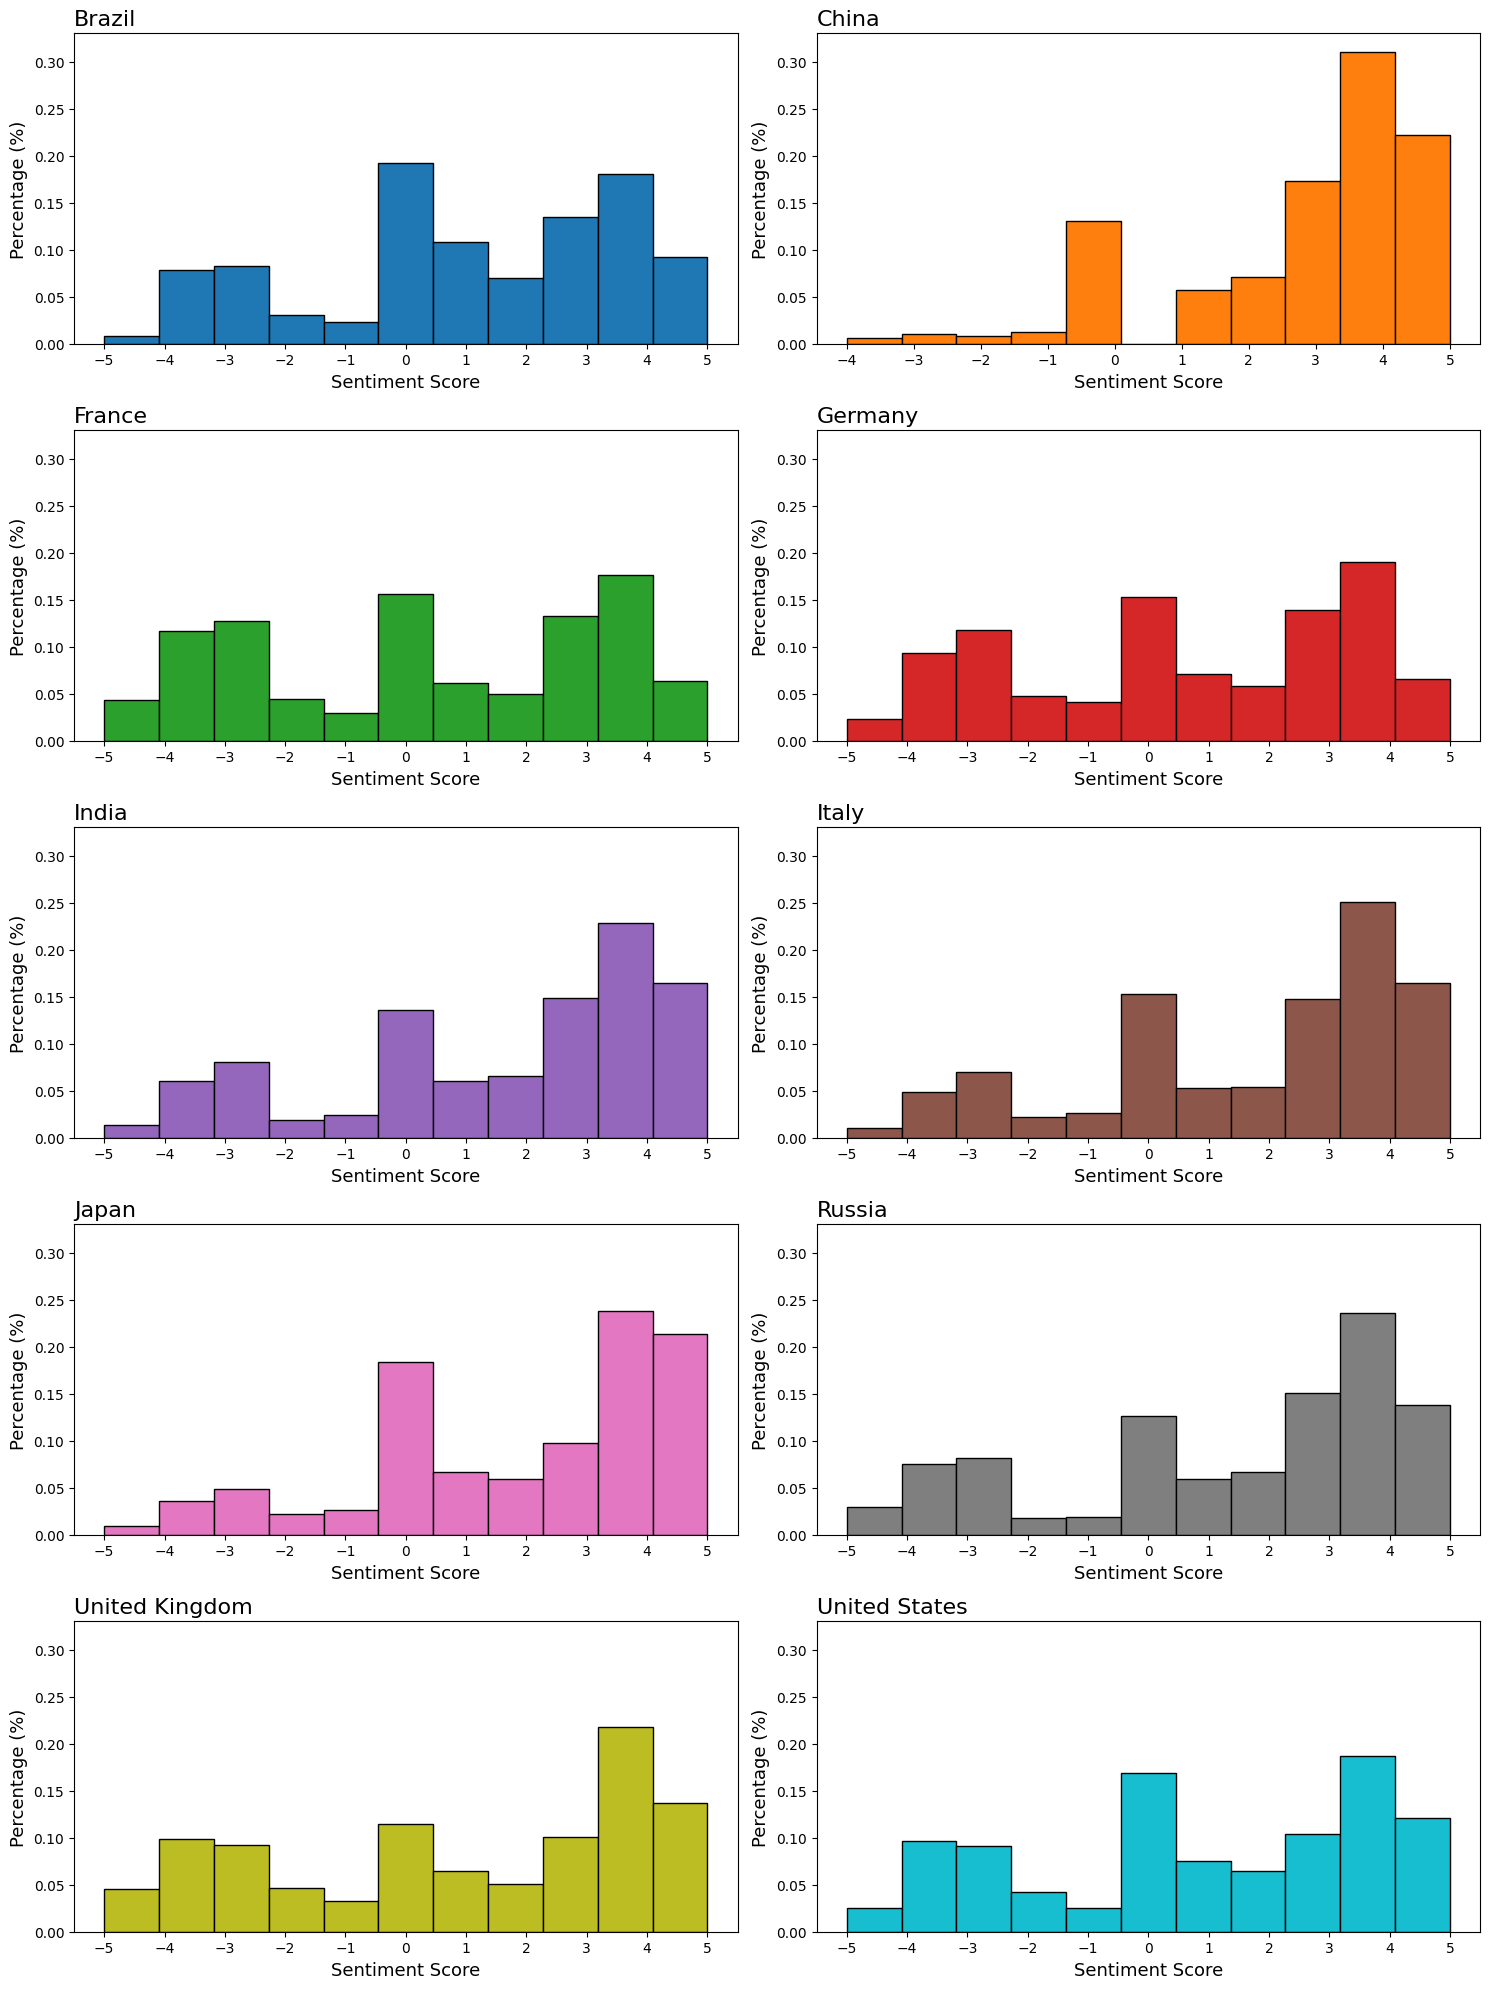

Brazil sentiment
 0.0    191
 4.0    180
 3.0    134
 1.0    108
 5.0     92
-3.0     82
-4.0     78
 2.0     69
-2.0     30
-1.0     23
-5.0      8
Name: count, dtype: int64
China sentiment
 4    282
 5    202
 3    157
 0    119
 2     64
 1     52
-1     11
-3      9
-2      7
-4      6
Name: count, dtype: int64
France sentiment
 4    176
 0    156
 3    133
-3    127
-4    117
 5     63
 1     61
 2     50
-2     44
-5     43
-1     30
Name: count, dtype: int64
Germany sentiment
 4.0    190
 0.0    153
 3.0    139
-3.0    118
-4.0     93
 1.0     71
 5.0     66
 2.0     58
-2.0     47
-1.0     41
-5.0     23
Name: count, dtype: int64
India sentiment
 4    228
 5    165
 3    149
 0    136
-3     80
 2     66
 1     60
-4     60
-1     24
-2     19
-5     13
Name: count, dtype: int64
Italy sentiment
 4    251
 5    164
 0    153
 3    148
-3     70
 2     54
 1     53
-4     49
-1     26
-2     22
-5     10
Name: count, dtype: int64
Japan sentiment
 4    238
 5    213
 0    184
 3  

In [ ]:
def plot_sentiment_histograms_by_country(country_dfs, country_names, colors=None):
    """
    Plots histograms of the sentiment variable for different countries in subplots.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's bars (optional).
    """
    n_countries = len(country_dfs)
    n_cols = 2  # You can adjust the number of columns for subplots
    n_rows = (n_countries + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert sentiment column to numeric, coercing errors to NaN
        sentiment_data = pd.to_numeric(df['sentiment'], errors='coerce').dropna()

        if not sentiment_data.empty:
            # Calculate percentages for the histogram
            weights = np.ones_like(sentiment_data) / len(sentiment_data)

            color = colors[i] if colors and i < len(colors) else None
            ax.hist(sentiment_data, bins=11, edgecolor='black', weights=weights, color=color) # Adjust bins as needed

            # Set x-axis ticks to unique sentiment values
            unique_sentiments = sorted(sentiment_data.unique())
            ax.set_xticks(unique_sentiments)

            ax.set_title(f'{country_name}', loc='left', fontsize=16)
            ax.set_xlabel('Sentiment Score', fontsize=13)
            ax.set_ylabel('Percentage (%)', fontsize=13)
            ax.set_ylim(0.00, 0.33)
            ax.grid(False)
        else:
            ax.set_title(f'{country_name} - No data available', loc='left')
            ax.set_visible(True) # Ensure the empty subplot is still displayed


    # Hide any unused subplots
    for j in range(n_countries, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert sentiment column to numeric, coercing errors to NaN
        sentiment_data = pd.to_numeric(df['sentiment'], errors='coerce').dropna()
        print(country_name, sentiment_data.value_counts())

country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plot_sentiment_histograms_by_country(country_dfs, country_names, colors)

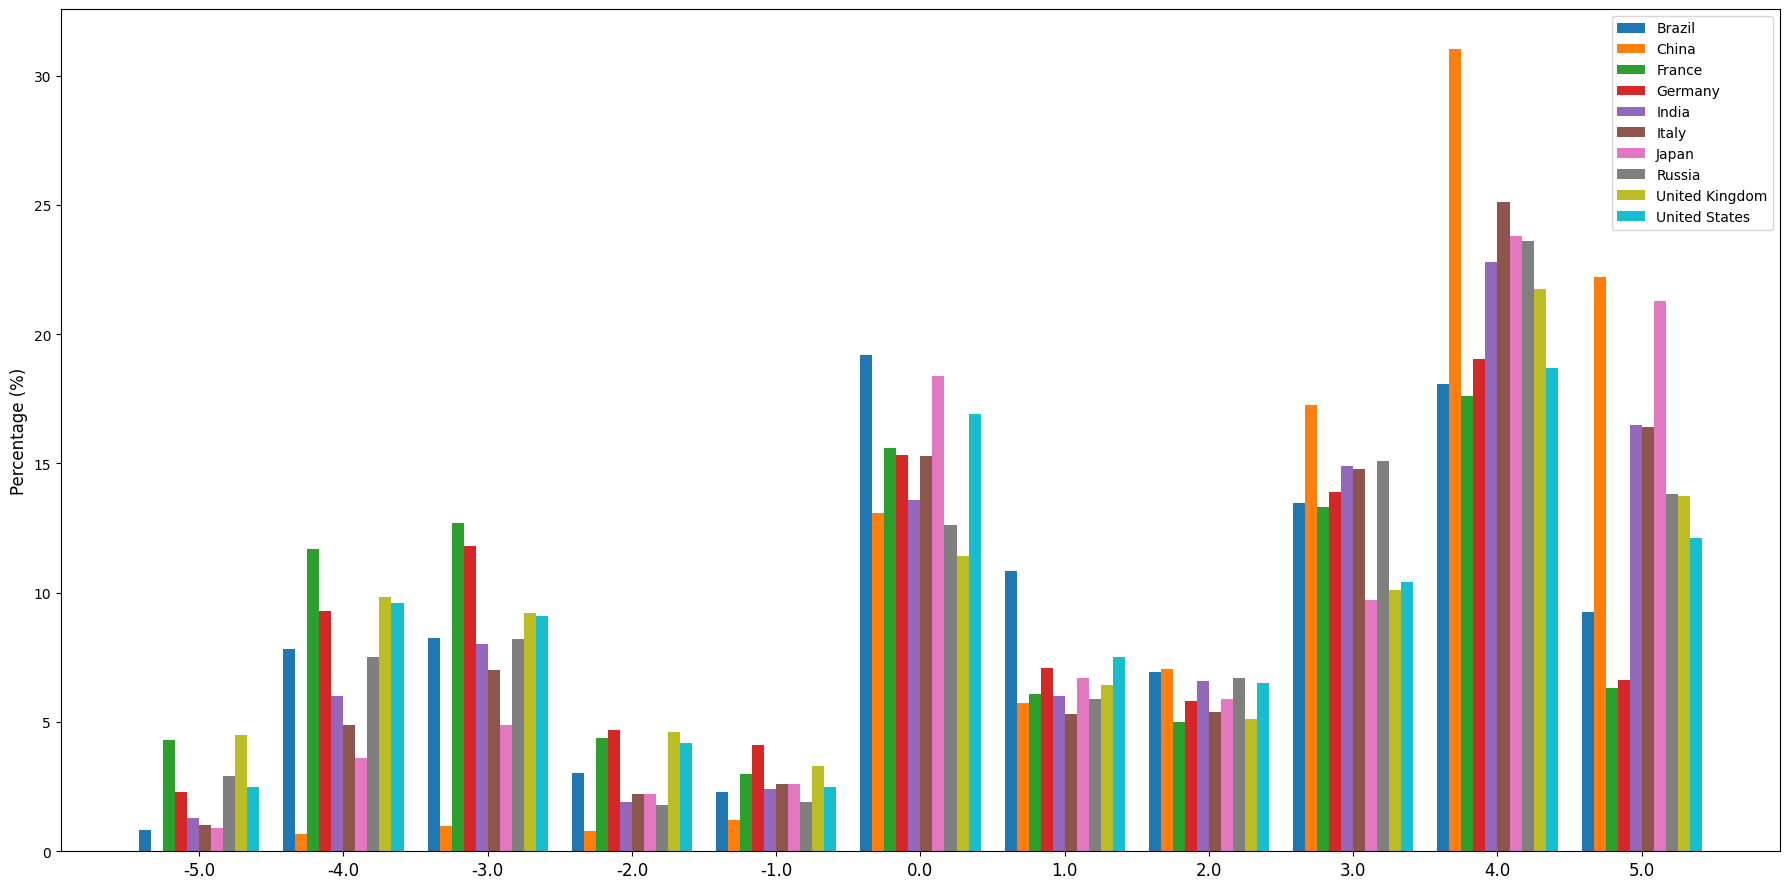

In [ ]:
def plot_sentiment_frequencies_by_country(country_dfs, country_names, colors=None):
    """
    Plots the sentiment frequencies of different countries side-by-side for comparison.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's bars (optional).
    """
    processed_dfs = []
    for df in country_dfs:
        # Convert sentiment column to numeric and drop NaNs within the function
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')
        processed_dfs.append(df.dropna(subset=['sentiment']))

    # Get the unique sentiments from all dataframes
    all_sentiments = set()
    for df in processed_dfs:
        all_sentiments.update(df['sentiment'].unique())

    # Sort the sentiments
    all_sentiments = sorted(list(all_sentiments))

    # Create a dictionary to store the sentiment percentages for each country
    sentiment_percentages = {sentiment: [] for sentiment in all_sentiments}

    # Populate the dictionary with the sentiment percentages
    for df in processed_dfs:
        total_count = df.shape[0]
        for sentiment in all_sentiments:
            count = df[df['sentiment'] == sentiment].shape[0]
            percentage = (count / total_count) * 100 if total_count > 0 else 0
            sentiment_percentages[sentiment].append(percentage)

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 9))
    x = np.arange(len(all_sentiments))
    width = 0.1
    gap = 0.2 # Define the gap between groups of bars

    # Plot the bars for each country
    for i, country_name in enumerate(country_names):
        percentages = [sentiment_percentages[sentiment][i] for sentiment in all_sentiments]
        color = colors[i] if colors and i < len(colors) else None
        # Adjust the x-position to include the gap
        ax.bar(x + i * width + x * gap, percentages, width, label=country_name, color=color)

    # Add labels, title, and legend
    ax.set_ylabel('Percentage (%)', fontsize=12)
    # Adjust the x-ticks position to be in the center of each group
    ax.set_xticks(x + ((len(country_names) - 1) * width) / 2 + x * gap)
    ax.set_xticklabels(all_sentiments, fontsize=12)
    ax.legend()

    plt.tight_layout()
    plt.show()


# List of dataframes and country names
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Plot the sentiment frequencies
plot_sentiment_frequencies_by_country(country_dfs, country_names)

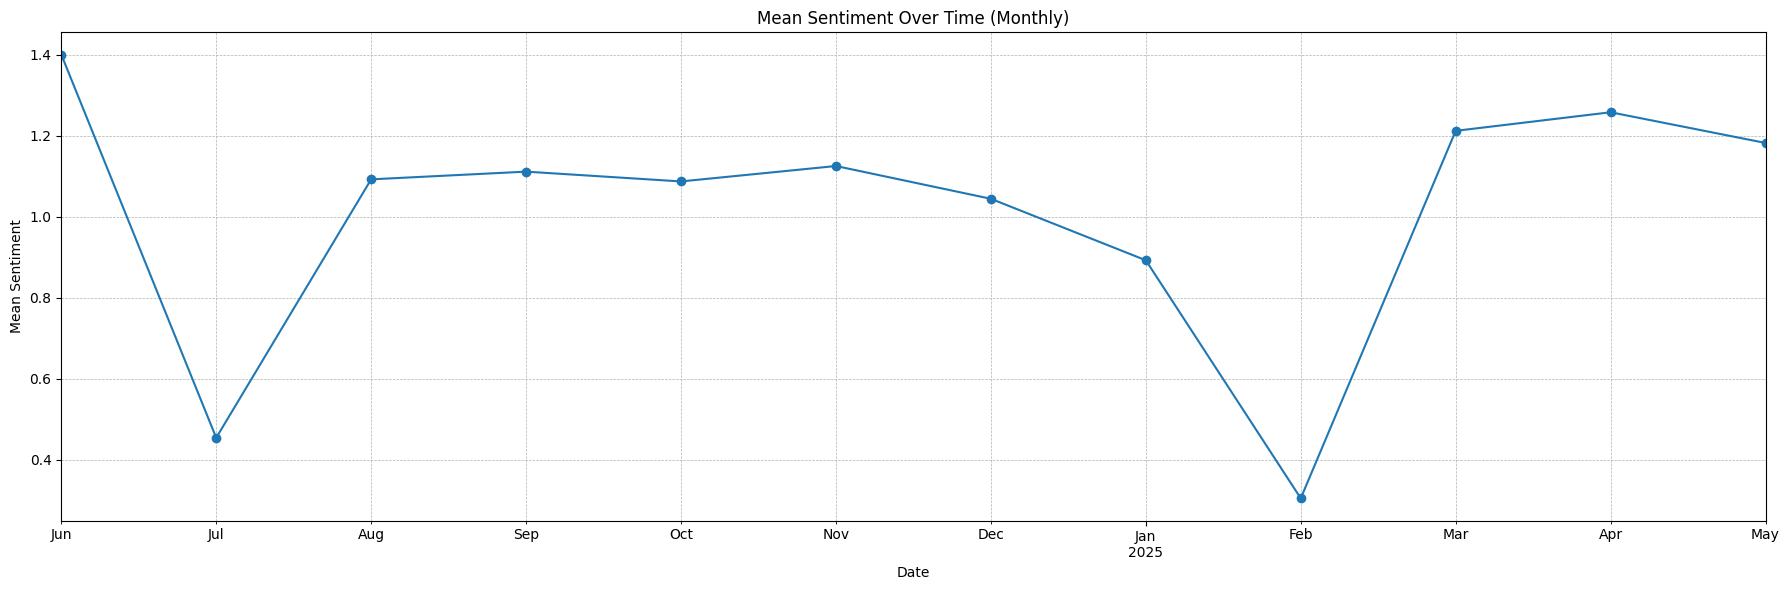

In [ ]:
def plot_sentiment_over_time(df: pd.DataFrame):
    """
    Plots the mean sentiment over time using the publish_date, aggregated by month.

    Args:
        df: A pandas DataFrame with 'publish_date' and 'sentiment' columns.
    """
    # Convert 'publish_date' to datetime objects
    df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

    # Convert 'sentiment' to numeric, coercing errors to NaN
    df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

    # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
    df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

    # Drop rows with invalid dates or missing sentiment
    df_cleaned = df.dropna(subset=['publish_date', 'sentiment'])

    # Group by month and calculate the mean sentiment
    sentiment_over_time_monthly = df_cleaned.groupby(df_cleaned['publish_date'].dt.to_period('M'))['sentiment'].mean()

    # Convert the PeriodIndex to datetime for plotting
    sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

    # Create the plot
    fig, ax = plt.subplots(figsize=(18, 6))
    sentiment_over_time_monthly.plot(ax=ax, marker='o', linestyle='-')

    # Add labels, title, and grid
    ax.set_ylabel('Mean Sentiment')
    ax.set_title('Mean Sentiment Over Time (Monthly)')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')

plot_sentiment_over_time(df)

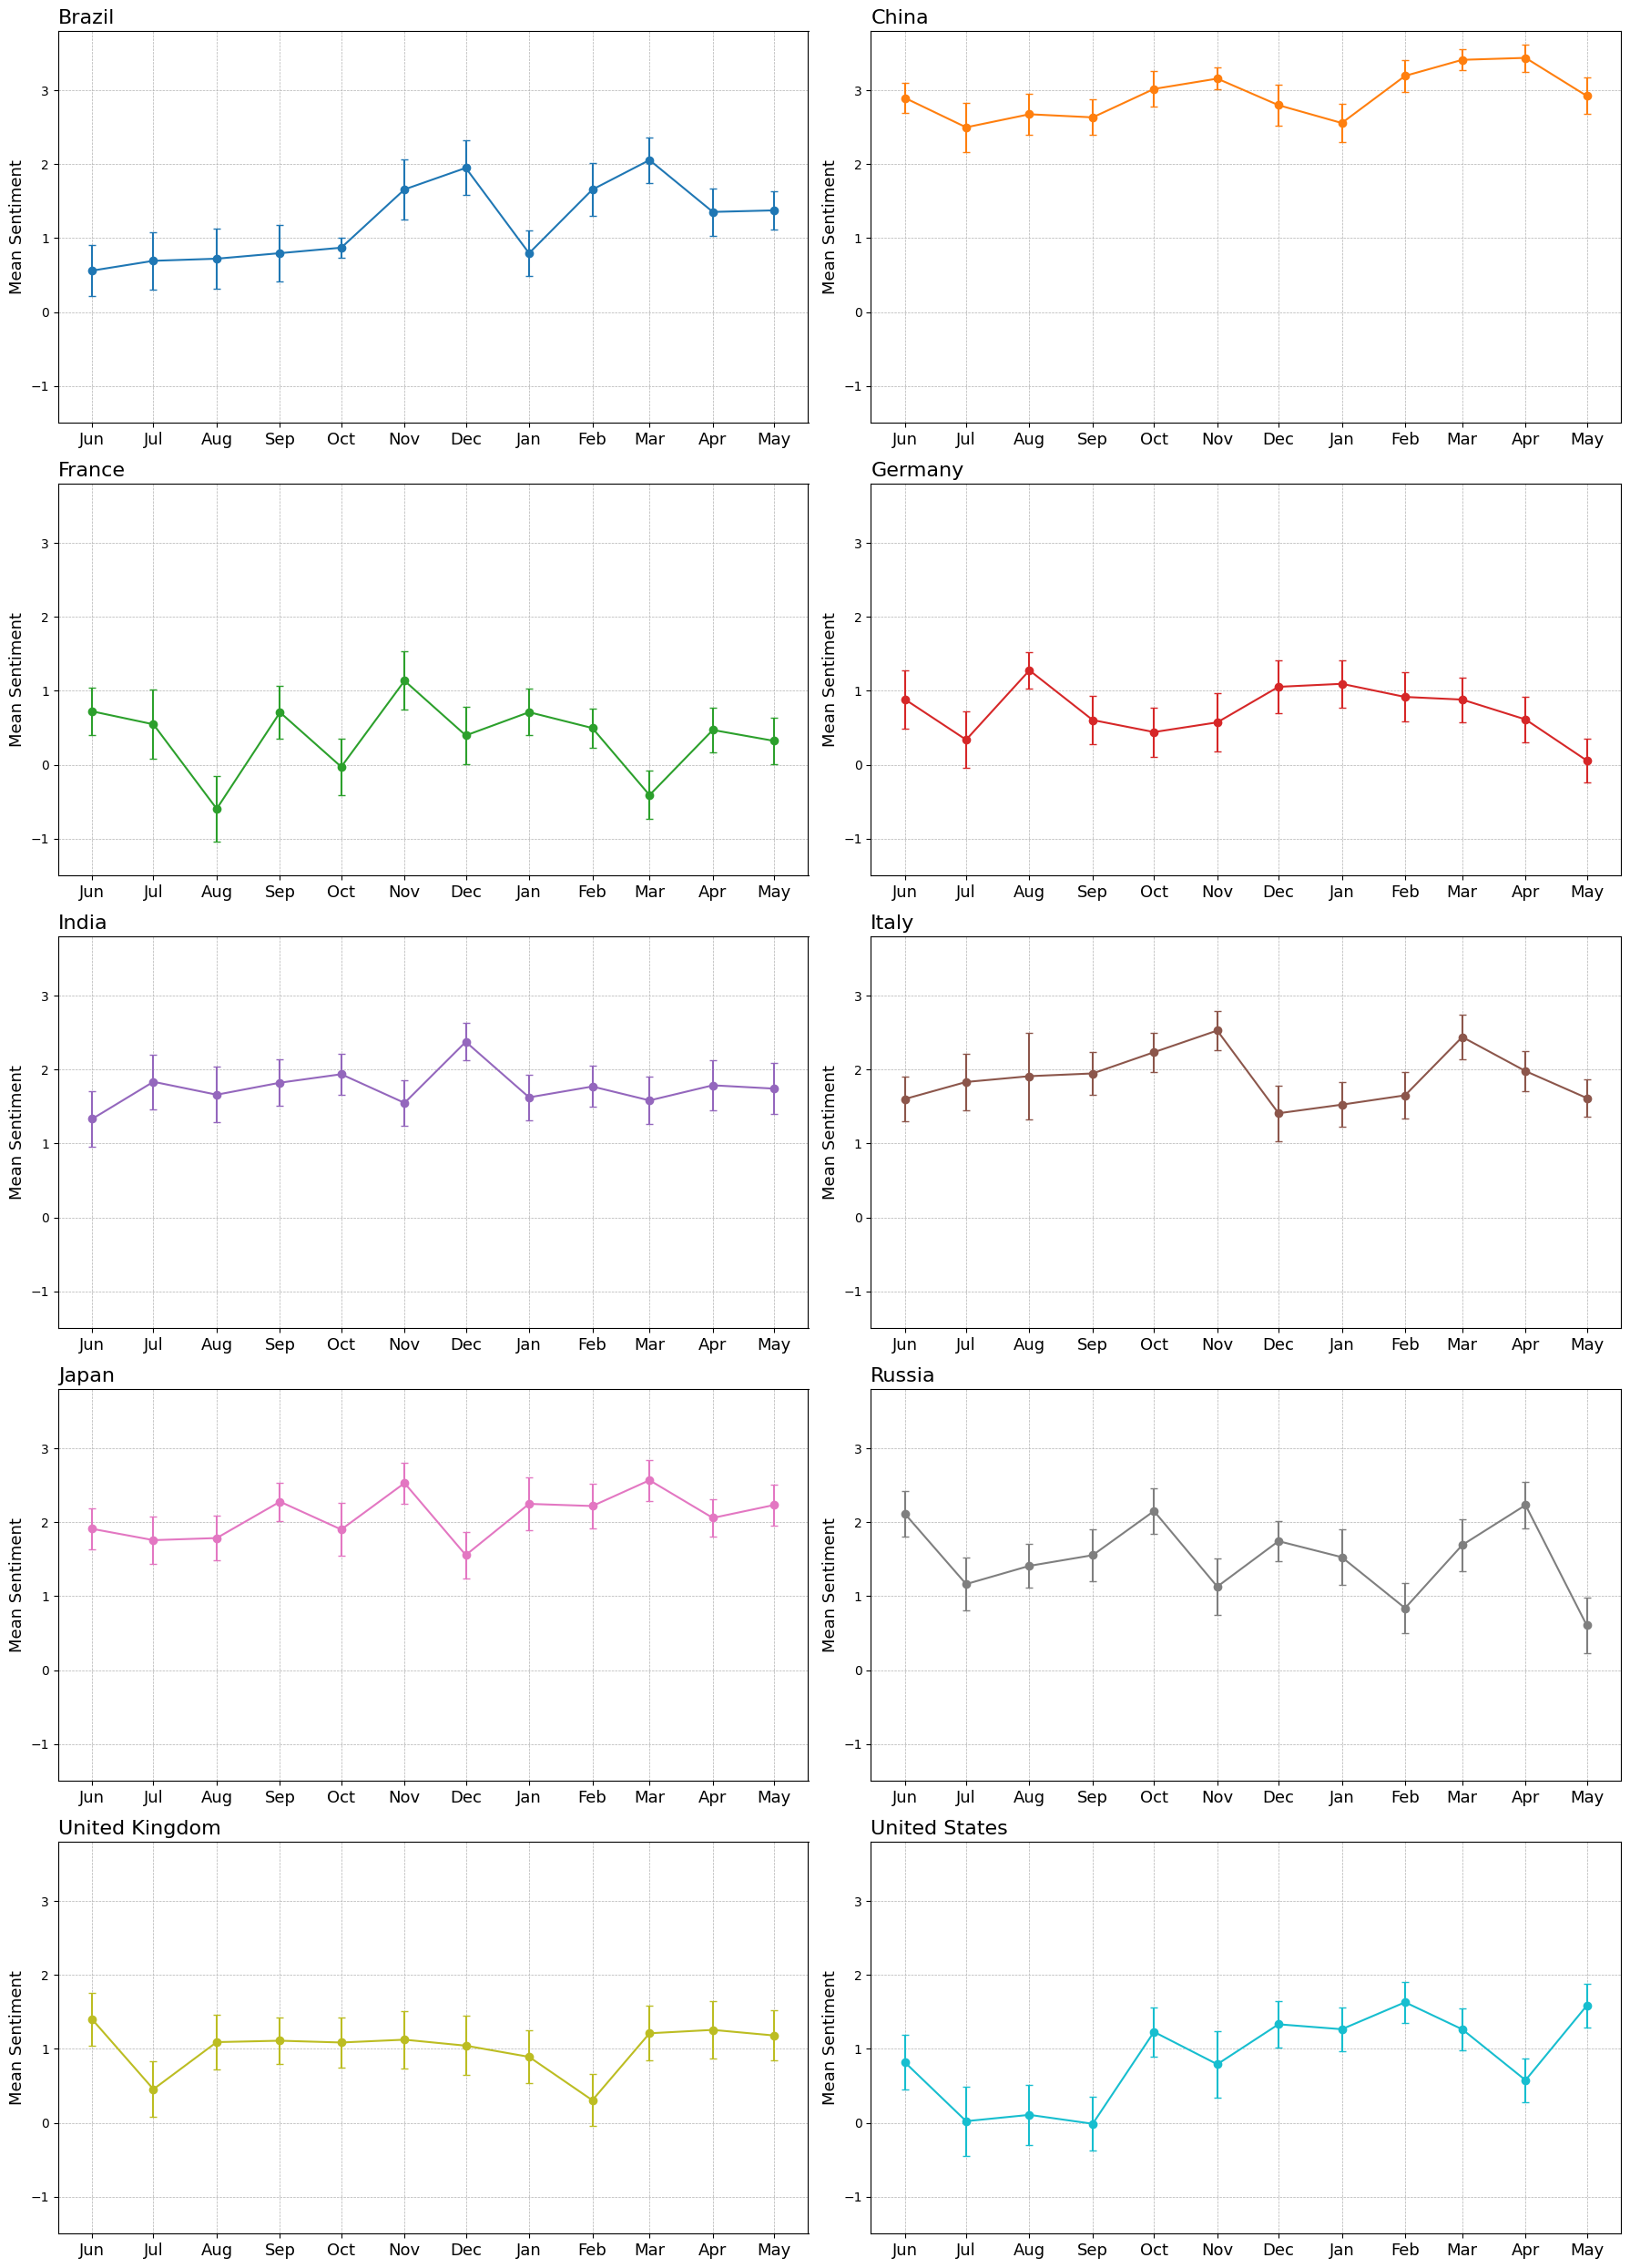

Brazil                   mean       sem
publish_date                    
2024-06-01    0.560976  0.340084
2024-07-01    0.693548  0.384516
2024-08-01    0.722222  0.409885
2024-09-01    0.797101  0.383249
2024-10-01    0.870968  0.137113
2024-11-01    1.660000  0.404677
2024-12-01    1.950820  0.371400
2025-01-01    0.796117  0.307703
2025-02-01    1.657534  0.359275
2025-03-01    2.057143  0.307185
2025-04-01    1.355263  0.318827
2025-05-01    1.376147  0.259639
China                   mean       sem
publish_date                    
2024-06-01    2.897959  0.206404
2024-07-01    2.500000  0.334198
2024-08-01    2.676923  0.273077
2024-09-01    2.634921  0.238726
2024-10-01    3.019608  0.238443
2024-11-01    3.159292  0.148510
2024-12-01    2.800000  0.277555
2025-01-01    2.558442  0.263068
2025-02-01    3.196429  0.216854
2025-03-01    3.413534  0.144831
2025-04-01    3.440000  0.185259
2025-05-01    2.925373  0.246471
France                   mean       sem
publish_date           

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import mdates

def plot_sentiment_over_time_subplots_by_country(country_dfs, country_names, colors=None):
    """
    Plots the mean sentiment over time for different countries in separate subplots, aggregated by month,
    including error margins.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with 'publish_date' and 'sentiment' columns.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's line (optional).
    """
    n_countries = len(country_dfs)
    n_cols = 2  # You can adjust the number of columns for subplots
    n_rows = (n_countries + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Determine overall min and max sentiment for consistent y-axis limits
    all_sentiment_data = pd.concat([pd.to_numeric(df['sentiment'], errors='coerce').dropna() for df in country_dfs])
    ymin, ymax = all_sentiment_data.min() - 0.2, all_sentiment_data.max() + 0.2 # Add a small buffer

    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Convert 'sentiment' to numeric, coercing errors to NaN
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Drop rows with invalid dates or missing sentiment
        df_cleaned = df.dropna(subset=['publish_date', 'sentiment'])

        if not df_cleaned.empty:
            # Group by month and calculate the mean sentiment and standard error
            sentiment_over_time_monthly = df_cleaned.groupby(df_cleaned['publish_date'].dt.to_period('M'))['sentiment'].agg(['mean', 'sem'])

            # Convert the PeriodIndex to datetime for plotting
            sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

            # Plot the monthly mean sentiment with error bars
            color = colors[i] if colors and i < len(colors) else None
            ax.errorbar(sentiment_over_time_monthly.index, sentiment_over_time_monthly['mean'],
                        yerr=sentiment_over_time_monthly['sem'], fmt='-o', capsize=3, label=country_names[i], color=color)

            ax.set_ylabel('Mean Sentiment', fontsize=13)
            ax.set_title(f'{country_name}', loc='left', fontsize=16)
            ax.grid(True, which='both', linestyle='--', linewidth=0.5)
            ax.set_ylim(-1.5, 3.8) # Set consistent y-axis limits

            # Format the x-axis to show abbreviated month names
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp(ax.get_xticklabels(), rotation=0, fontsize=13)

        else:
            ax.set_title(f'{country_name} - No data available', loc='left')
            ax.set_visible(True) # Ensure the empty subplot is still displayed

    # Hide any unused subplots
    for j in range(n_countries, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Convert 'sentiment' to numeric, coercing errors to NaN
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Drop rows with invalid dates or missing sentiment
        df_cleaned = df.dropna(subset=['publish_date', 'sentiment'])

        if not df_cleaned.empty:
            # Group by month and calculate the mean sentiment and standard error
            sentiment_over_time_monthly = df_cleaned.groupby(df_cleaned['publish_date'].dt.to_period('M'))['sentiment'].agg(['mean', 'sem'])

            # Convert the PeriodIndex to datetime for plotting
            sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()
            print(country_name, sentiment_over_time_monthly)

# Example usage:
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plot_sentiment_over_time_subplots_by_country(country_dfs, country_names, colors)

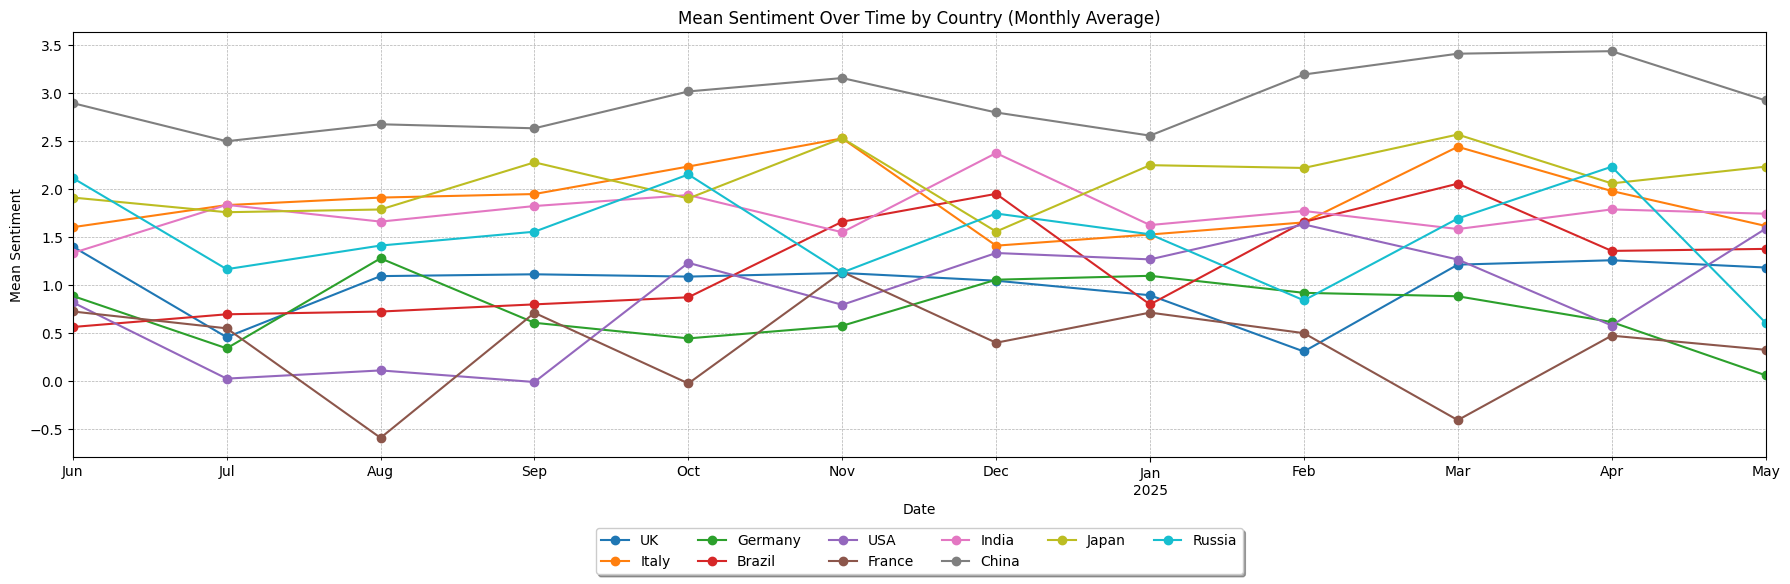

In [ ]:
def plot_sentiment_over_time_by_country(country_dfs, country_names, colors=None):
    """
    Plots the mean sentiment over time for different countries, aggregated by month.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with 'publish_date' and 'sentiment' columns.
        country_names: A list of strings, the names of the countries.
        colors: A list of colors for each country's line (optional).
    """
    fig, ax = plt.subplots(figsize=(18, 6))

    for i, df in enumerate(country_dfs):
        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Convert 'sentiment' to numeric, coercing errors to NaN
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Drop rows with invalid dates or missing sentiment
        df_cleaned = df.dropna(subset=['publish_date', 'sentiment'])

        # Group by month and calculate the mean sentiment
        sentiment_over_time_monthly = df_cleaned.groupby(df_cleaned['publish_date'].dt.to_period('M'))['sentiment'].mean()

        # Convert the PeriodIndex to datetime for plotting
        sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

        # Plot the monthly mean sentiment for the current country
        color = colors[i] if colors and i < len(colors) else None
        sentiment_over_time_monthly.plot(ax=ax, marker='o', linestyle='-', label=country_names[i], color=color)

    # Add labels, title, and grid
    ax.set_ylabel('Mean Sentiment')
    ax.set_title('Mean Sentiment Over Time by Country (Monthly Average)')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Move the legend outside the plot, below and centered
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(country_names)//2 + 1)

    plt.tight_layout()
    plt.show()

# Example usage with your dataframes:
country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
]

country_names = ['UK', 'Italy', 'Germany', 'Brazil', 'USA', 'France', 'India', 'China', 'Japan', 'Russia']

plot_sentiment_over_time_by_country(country_dfs, country_names)

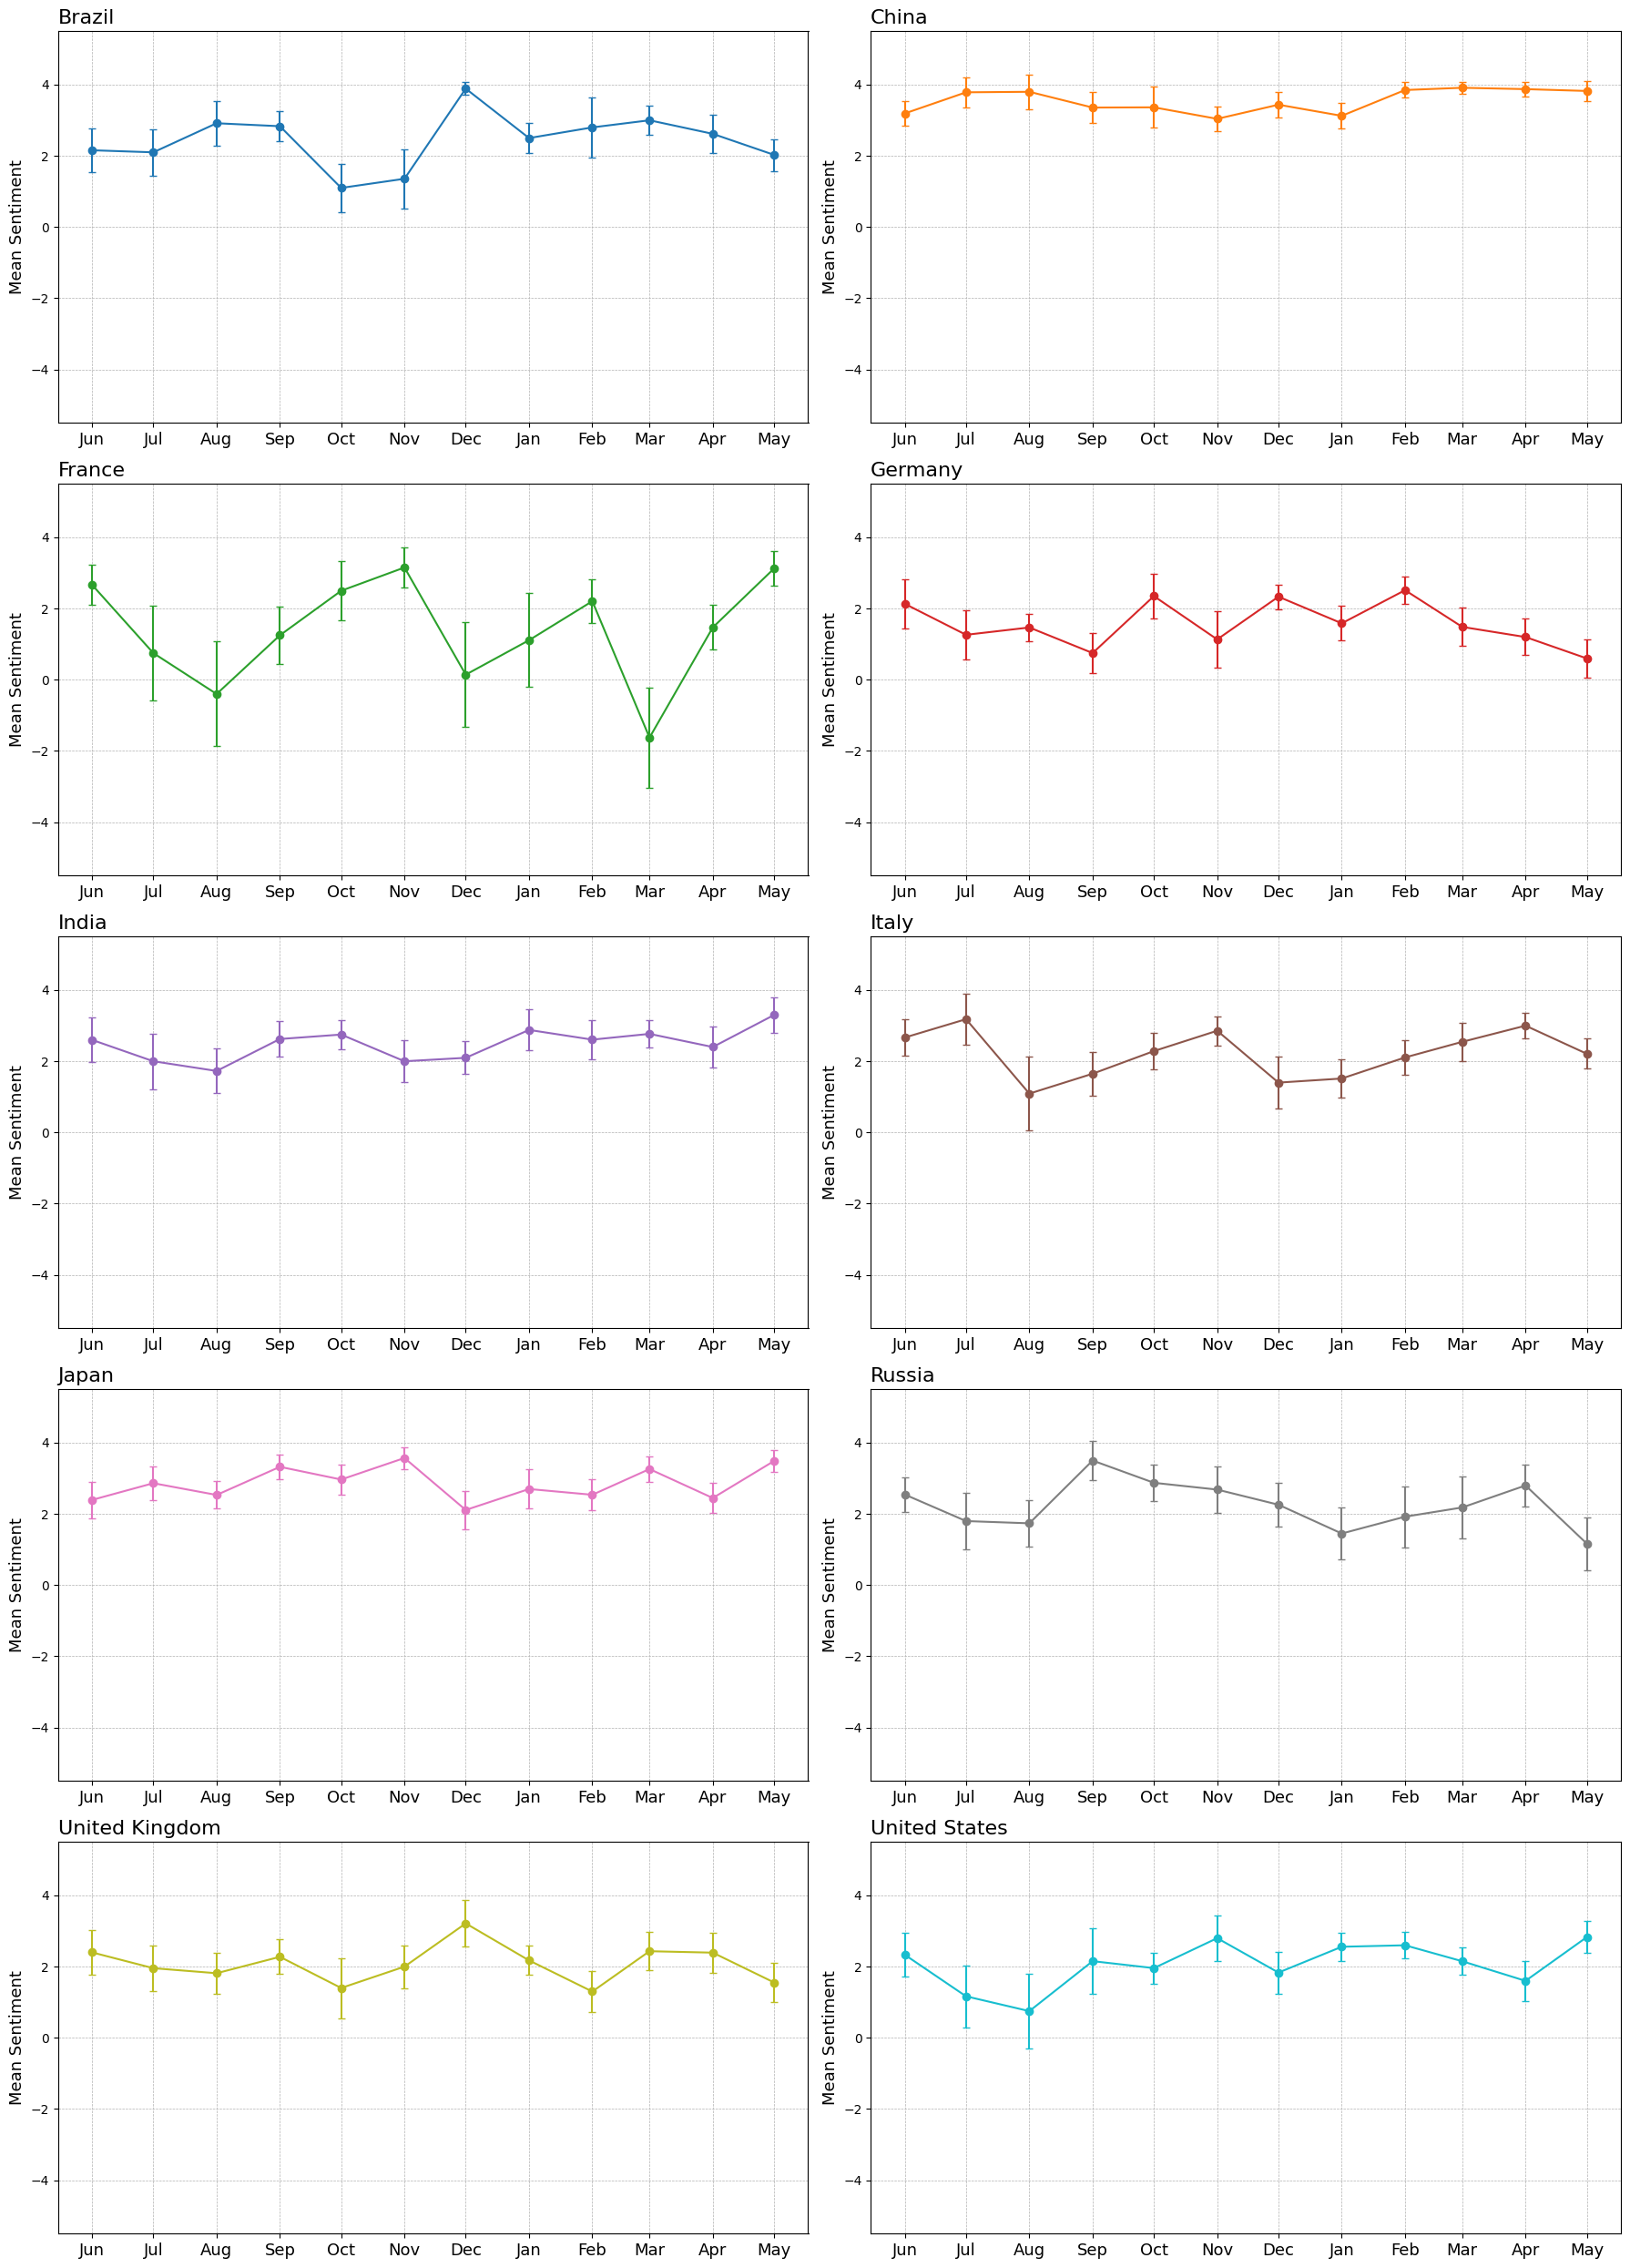

Brazil                   mean       sem
publish_date                    
2024-06-01    2.157895  0.617783
2024-07-01    2.100000  0.652525
2024-08-01    2.916667  0.633154
2024-09-01    2.833333  0.422024
2024-10-01    1.100000  0.680170
2024-11-01    1.357143  0.836050
2024-12-01    3.888889  0.178755
2025-01-01    2.500000  0.417298
2025-02-01    2.800000  0.840635
2025-03-01    3.000000  0.418854
2025-04-01    2.619048  0.536639
2025-05-01    2.028571  0.448125
China                   mean       sem
publish_date                    
2024-06-01    3.192308  0.350908
2024-07-01    3.785714  0.421647
2024-08-01    3.800000  0.489898
2024-09-01    3.357143  0.439869
2024-10-01    3.363636  0.576395
2024-11-01    3.040000  0.353459
2024-12-01    3.437500  0.364792
2025-01-01    3.125000  0.352077
2025-02-01    3.850000  0.220943
2025-03-01    3.913043  0.175356
2025-04-01    3.875000  0.199546
2025-05-01    3.823529  0.274335
France                   mean       sem
publish_date           

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import mdates

def plot_frame_sentiment_over_time_by_country_subplots(country_dfs, country_names, frame_name, colors=None):
    """
    Plots the mean sentiment over time for a specific frame, comparing different countries,
    in separate subplots, aggregated by month, including error margins.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with 'publish_date', 'sentiment', and 'frame' columns.
        country_names: A list of strings, the names of the countries.
        frame_name: A string, the name of the frame to plot.
        colors: A list of colors for each country's line (optional).
    """
    n_countries = len(country_dfs)
    n_cols = 2  # You can adjust the number of columns for subplots
    n_rows = (n_countries + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Determine overall min and max sentiment for consistent y-axis limits
    all_sentiment_data = pd.concat([pd.to_numeric(df[df['frame'] == frame_name]['sentiment'], errors='coerce').dropna() for df in country_dfs])
    ymin, ymax = all_sentiment_data.min() - 0.2 if not all_sentiment_data.empty else 0, all_sentiment_data.max() + 0.2 if not all_sentiment_data.empty else 5


    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Convert 'sentiment' to numeric, coercing errors to NaN
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Filter for the specific frame and drop rows with invalid dates or missing sentiment
        df_frame = df[df['frame'] == frame_name].dropna(subset=['publish_date', 'sentiment'])

        if not df_frame.empty:
            # Group by month and calculate the mean sentiment and standard error for the frame
            sentiment_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M'))['sentiment'].agg(['mean', 'sem'])


            # Convert the PeriodIndex to datetime for plotting
            sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

            # Plot the monthly mean sentiment for the current country and frame with error bars
            color = colors[i] if colors and i < len(colors) else None
            ax.errorbar(sentiment_over_time_monthly.index, sentiment_over_time_monthly['mean'],
                        yerr=sentiment_over_time_monthly['sem'], fmt='-o', capsize=3, label=country_names[i], color=color)


            ax.set_ylabel('Mean Sentiment', fontsize=13)
            ax.set_title(f'{country_name}', loc='left', fontsize=16)
            ax.grid(True, which='both', linestyle='--', linewidth=0.5)

            # Set the same y-axis limit for all subplots
            ax.set_ylim(-5.5, 5.5)

            # Format the x-axis to show abbreviated month names
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp(ax.get_xticklabels(), rotation=0, fontsize=13)

        else:
            ax.set_title(f'{country_name} - No data available for frame: "{frame_name}"', loc='left')
            ax.set_visible(True) # Ensure the empty subplot is still displayed


    # Hide any unused subplots
    for j in range(n_countries, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    for i, df in enumerate(country_dfs):
        ax = axes[i]
        country_name = country_names[i]

        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Convert 'sentiment' to numeric, coercing errors to NaN
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Filter for the specific frame and drop rows with invalid dates or missing sentiment
        df_frame = df[df['frame'] == frame_name].dropna(subset=['publish_date', 'sentiment'])

        if not df_frame.empty:
            # Group by month and calculate the mean sentiment and standard error for the frame
            sentiment_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M'))['sentiment'].agg(['mean', 'sem'])

            # Convert the PeriodIndex to datetime for plotting
            sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()
            print(country_name, sentiment_over_time_monthly)

# Example usage:
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_names = ['Brazil',  'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Example of how to use the new function (replace 'Your Frame Name' with the actual frame name)
plot_frame_sentiment_over_time_by_country_subplots(country_dfs, country_names, 'AI impacts on businesses, economy, and jobs', colors)

#AI impacts on businesses, economy, and jobs
#AI-based innovative solutions
#AI regulations, ethics, and data privacy
#AI in national security and global partnerships
#AI competition and market dynamics in tech industries
#AI disruptions in media and creative industries
#AI transformations in education and research
#AI in healthcare and climate change
#AI in politics, elections, and public opinion
#Other

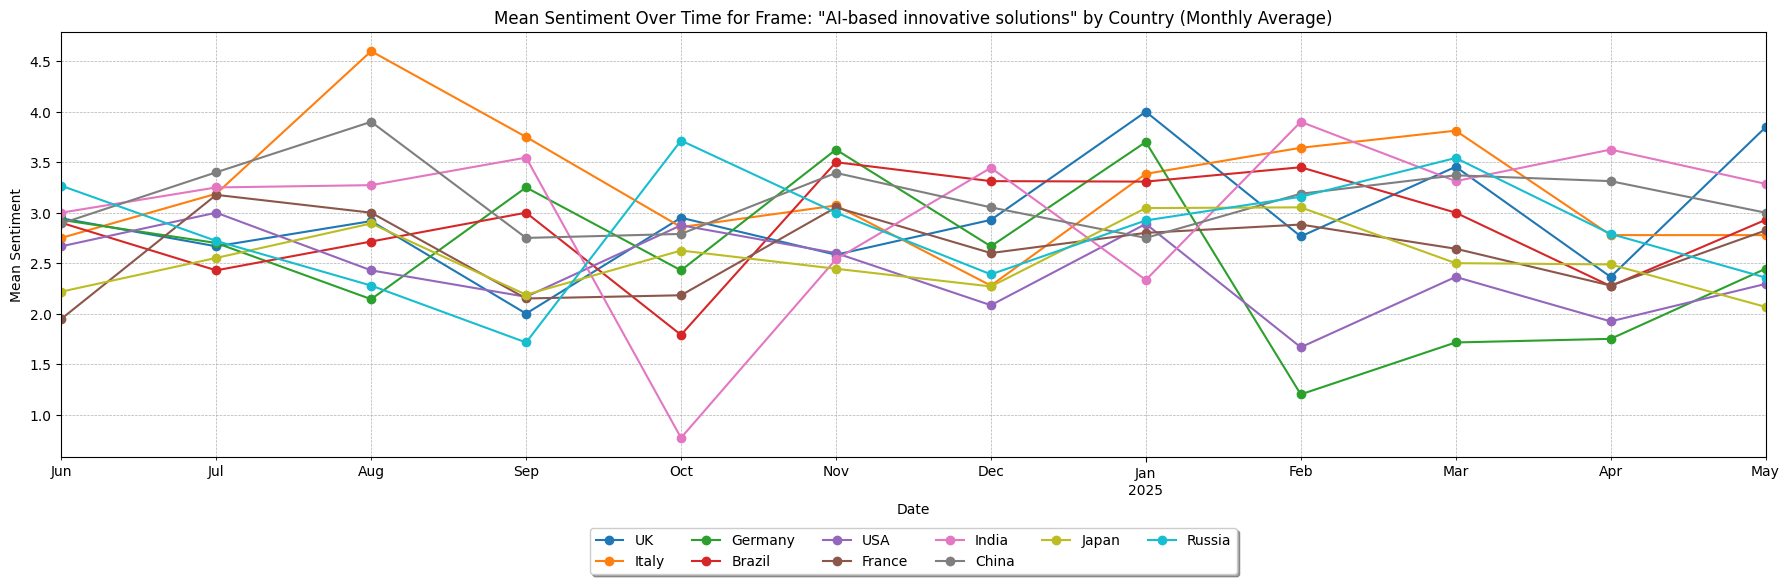

In [ ]:
def plot_frame_sentiment_over_time_by_country(country_dfs, country_names, frame_name, colors=None):
    """
    Plots the mean sentiment over time for a specific frame, comparing different countries,
    aggregated by month.

    Args:
        country_dfs: A list of pandas DataFrames, one for each country, with 'publish_date', 'sentiment', and 'frame' columns.
        country_names: A list of strings, the names of the countries.
        frame_name: A string, the name of the frame to plot.
        colors: A list of colors for each country's line (optional).
    """
    fig, ax = plt.subplots(figsize=(18, 6))

    for i, df in enumerate(country_dfs):

        # Convert 'publish_date' to datetime objects
        df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

        # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
        df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))

        # Convert 'sentiment' to numeric, coercing errors to NaN
        df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

        # Filter for the specific frame and drop rows with invalid dates or missing sentiment
        df_frame = df[df['frame'] == frame_name].dropna(subset=['publish_date', 'sentiment'])

        if not df_frame.empty:
            # Group by month and calculate the mean sentiment for the frame
            sentiment_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M'))['sentiment'].mean()

            # Convert the PeriodIndex to datetime for plotting
            sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

            # Plot the monthly mean sentiment for the current country and frame
            color = colors[i] if colors and i < len(colors) else None
            sentiment_over_time_monthly.plot(ax=ax, marker='o', linestyle='-', label=country_names[i], color=color)
        else:
            print(f"No data found for frame '{frame_name}' in {country_names[i]}")


    # Add labels, title, and grid
    ax.set_ylabel('Mean Sentiment')
    ax.set_title(f'Mean Sentiment Over Time for Frame: "{frame_name}" by Country (Monthly Average)')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Move the legend outside the plot, below and centered
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(country_names)//2 + 1)

    plt.tight_layout()
    plt.show()

# Example usage with your dataframes:
country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
]

country_names = ['UK', 'Italy', 'Germany', 'Brazil', 'USA', 'France', 'India', 'China', 'Japan', 'Russia']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

# Example of how to use the new function (replace 'Your Frame Name' with the actual frame name)
plot_frame_sentiment_over_time_by_country(country_dfs, country_names, 'AI-based innovative solutions')

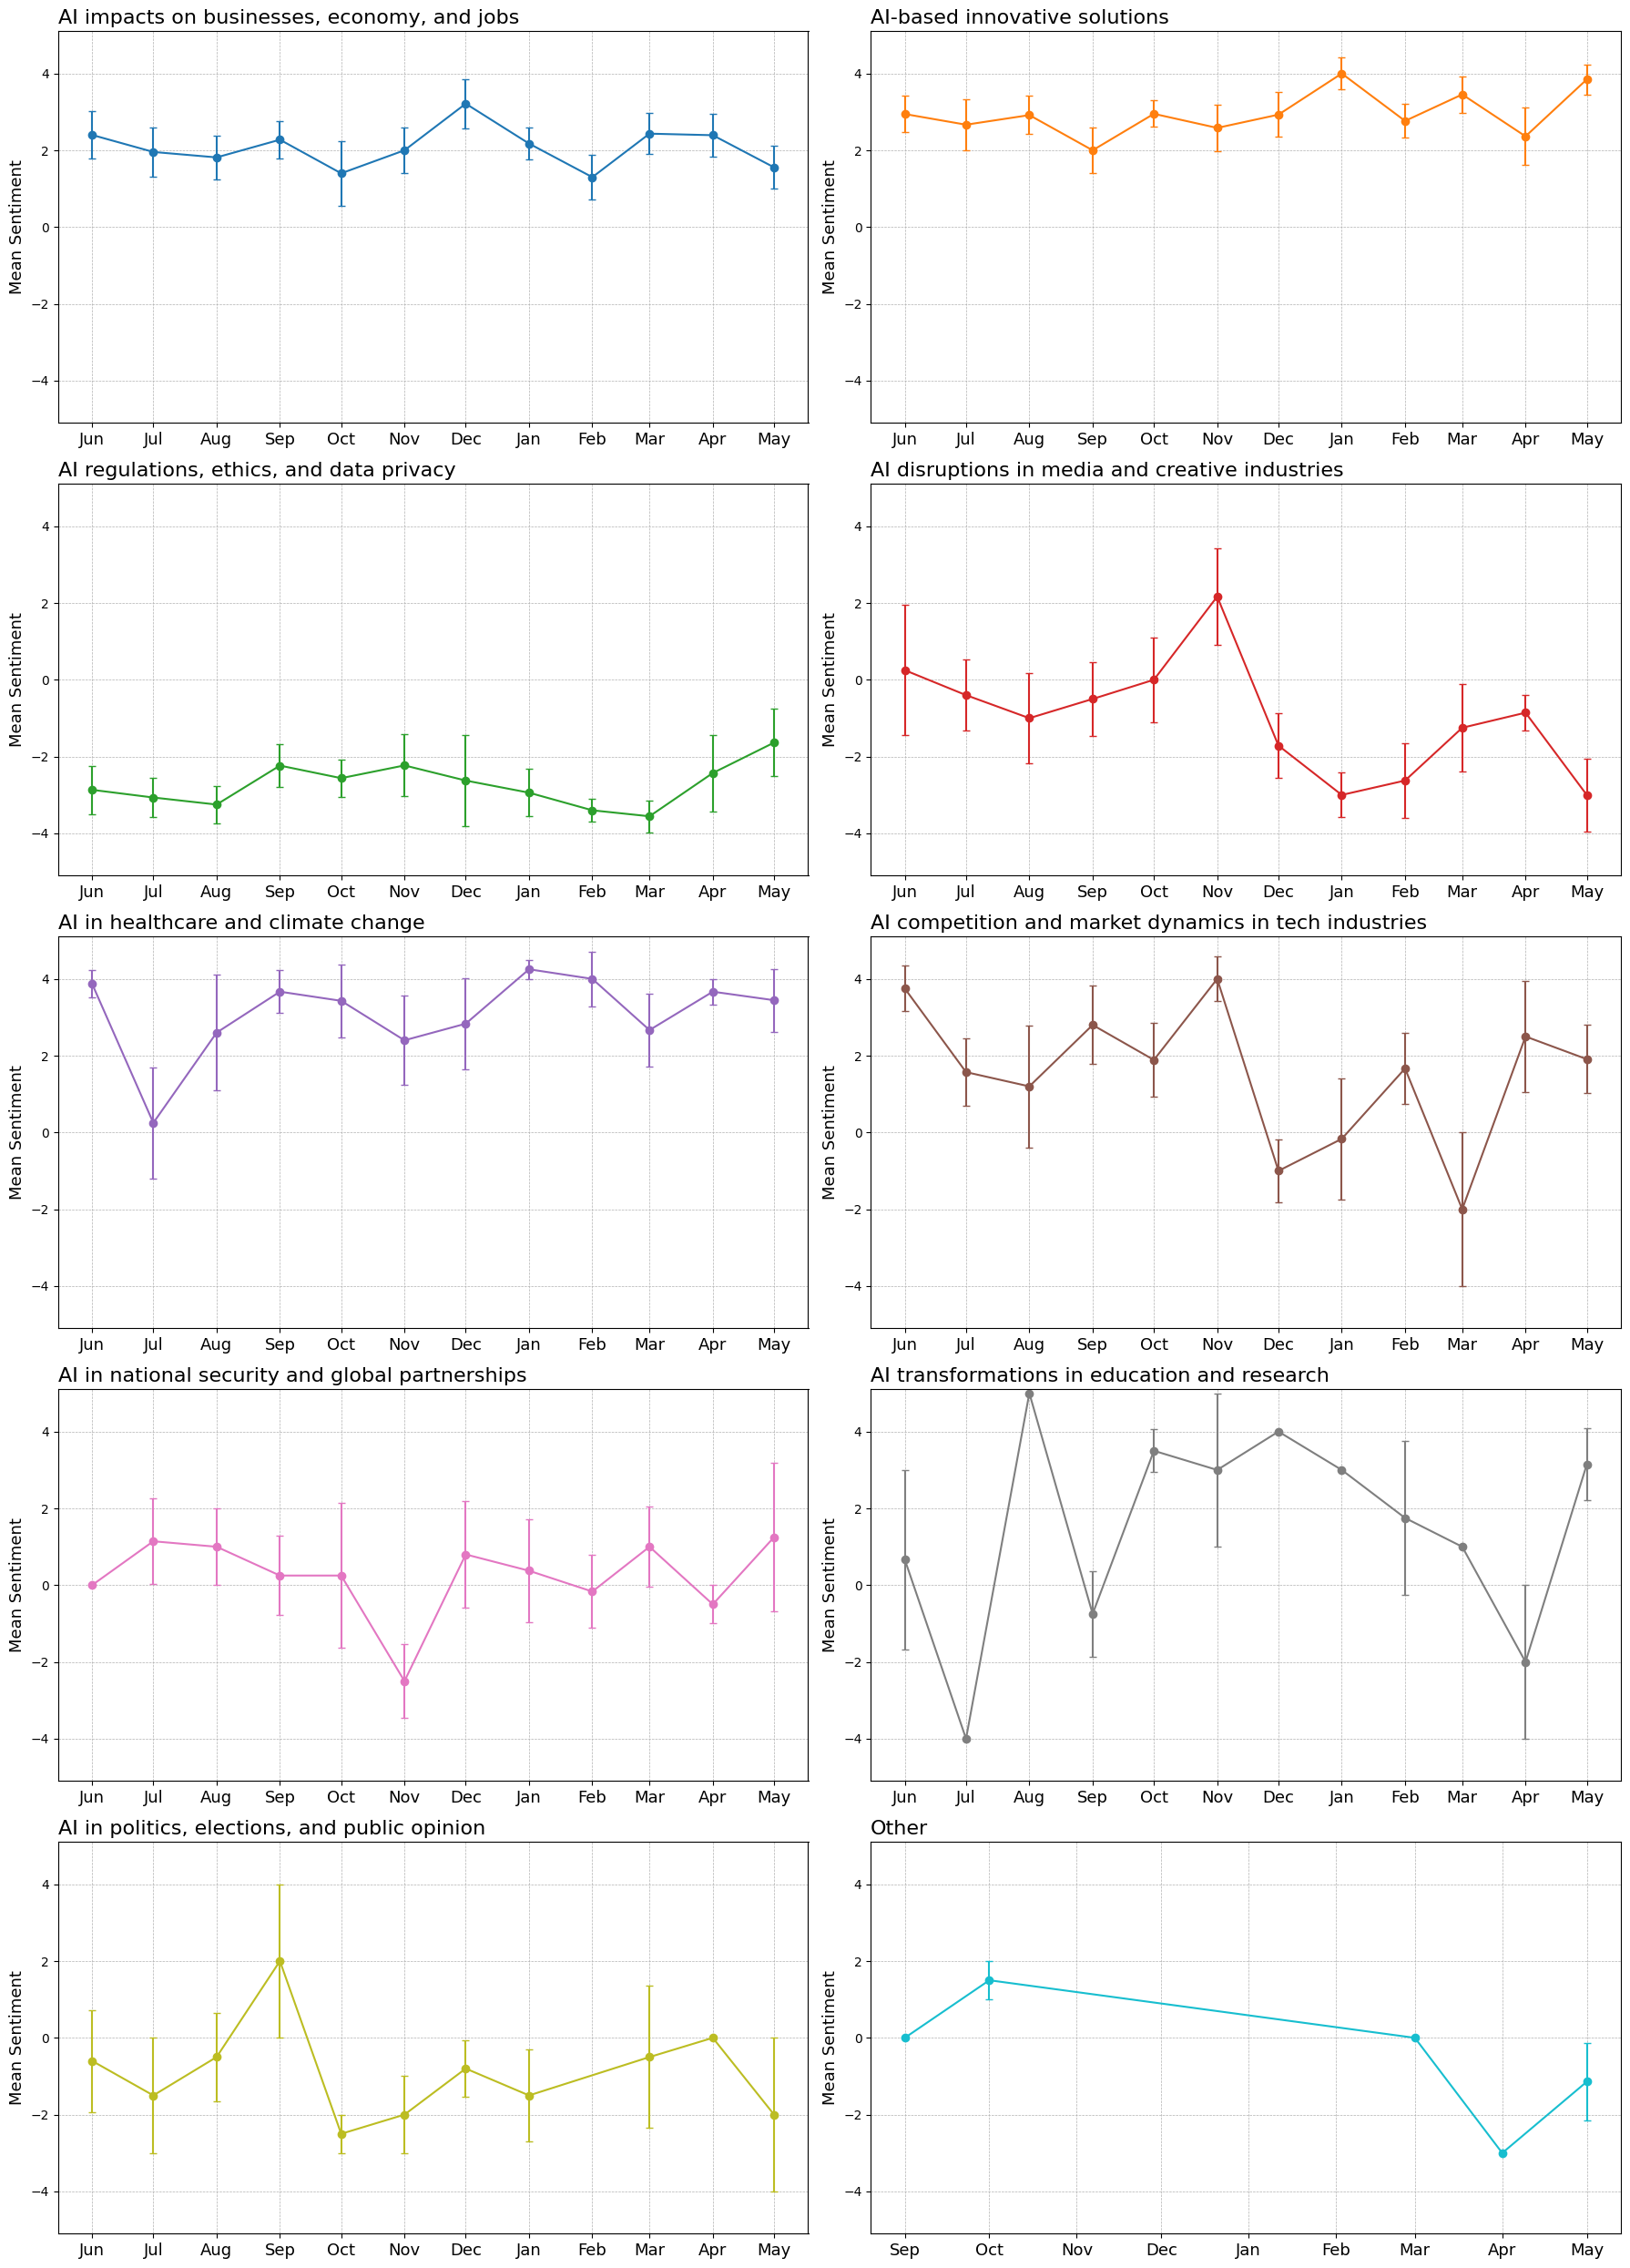

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import mdates

def plot_top_frames_sentiment_over_time_single_country(df: pd.DataFrame, country_name: str, top: int = 10, colors=None):
    """
    Plots the mean sentiment over time for the top N most frequent frames
    within a single country.

    Args:
        df: A pandas DataFrame for a single country, with 'publish_date', 'sentiment', and 'frame' columns.
        country_name: The name of the country for the plot title.
        top: The number of top frames to plot (default is 10).
        colors: A list of colors for each frame's line (optional).
    """
    # Convert 'publish_date' to datetime objects
    df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
    # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
    df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))
    # Convert 'sentiment' to numeric, coercing errors to NaN
    df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')
    # Drop rows with invalid dates or missing sentiment
    df_cleaned = df.dropna(subset=['publish_date', 'sentiment', 'frame'])

    if df_cleaned.empty:
        print(f"No data available for {country_name} to plot frame sentiment over time.")
        return

    # Get the top N most frequent frames for the current country
    top_frames = df_cleaned['frame'].value_counts().nlargest(top).index.tolist()

    # Determine the number of rows and columns for subplots
    n_frames = len(top_frames)
    n_cols = 2  # You can adjust the number of columns
    n_rows = (n_frames + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Determine the overall min and max sentiment for setting consistent y-axis limits
    all_sentiment_values = df_cleaned[df_cleaned['frame'].isin(top_frames)]['sentiment'].dropna()
    ymin, ymax = all_sentiment_values.min() - 0.1, all_sentiment_values.max() + 0.1 # Add a small buffer

    for i, frame_name in enumerate(top_frames):
        ax = axes[i]
        df_frame = df_cleaned[df_cleaned['frame'] == frame_name]

        if not df_frame.empty:
            sentiment_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M'))['sentiment'].agg(['mean', 'sem'])
            sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

            # Plot the monthly mean sentiment for the current frame with error bars
            color = colors[i] if colors and i < len(colors) else None
            ax.errorbar(sentiment_over_time_monthly.index, sentiment_over_time_monthly['mean'],
                        yerr=sentiment_over_time_monthly['sem'], fmt='-o', capsize=3, label=frame_name, color=color, ecolor=color) # Added ecolor=color

            ax.set_ylabel('Mean Sentiment', fontsize=13)
            ax.set_title(f'{frame_name}', loc='left', fontsize=16)
            ax.grid(True, which='both', linestyle='--', linewidth=0.5)

            # Set the same y-axis limit for all subplots
            ax.set_ylim(ymin, ymax)

            # Format the x-axis to show abbreviated month names
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp(ax.get_xticklabels(), rotation=0, fontsize=13)
        else:
            ax.set_title(f'{frame_name} - No data available for {country_name}', loc='left')
            ax.set_visible(True) # Ensure the empty subplot is still displayed

    # Hide any unused subplots and ensure labels and xticks are hidden for them
    for j in range(n_frames, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()

# Example usage (replace with the actual dataframe and country name you want to use):
country_dfs = [
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')]

country_names = ['UK']

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plot_top_frames_sentiment_over_time_single_country(df, 'UK', 10, colors)

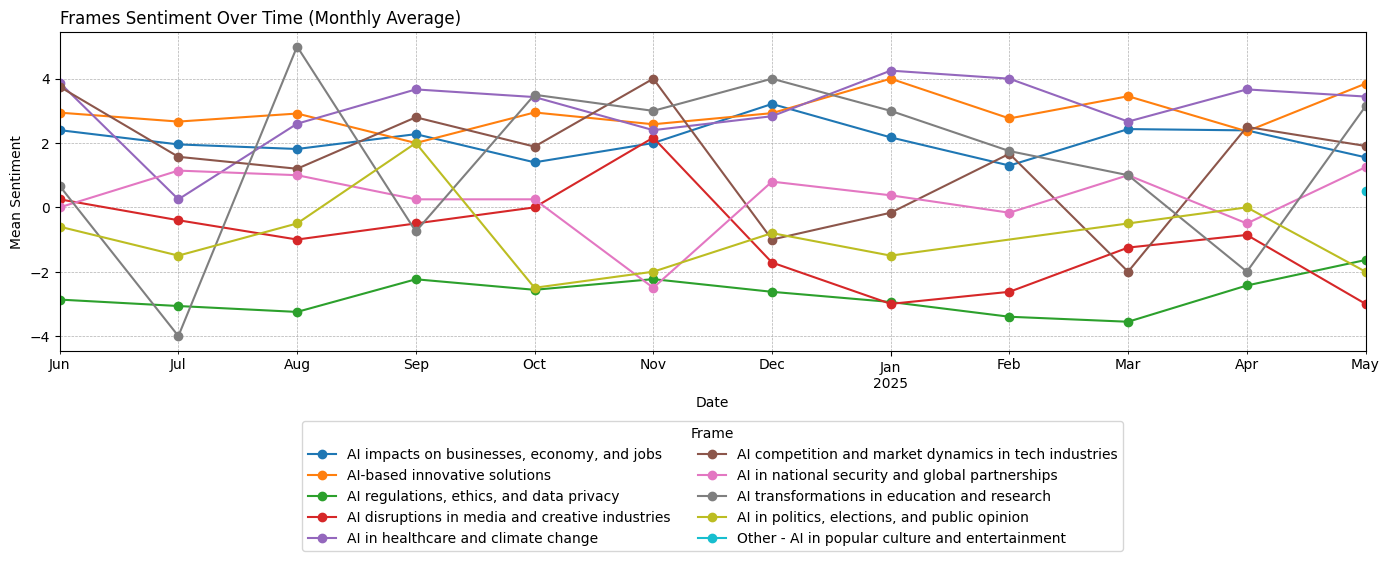

In [ ]:
def plot_top_frames_sentiment_over_time_single_country(df: pd.DataFrame, country_name: str, top: int = 10):
    """
    Plots the mean sentiment over time for the top N most frequent frames
    within a single country.

    Args:
        df: A pandas DataFrame for a single country, with 'publish_date', 'sentiment', and 'frame' columns.
        country_name: The name of the country for the plot title.
        top: The number of top frames to plot (default is 10).
    """
    # Convert 'publish_date' to datetime objects
    df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
    # Replace '2025-06-01' with '2025-05-31' in 'publish_date' column
    df['publish_date'] = df['publish_date'].replace(pd.to_datetime('2025-06-01'), pd.to_datetime('2025-05-31'))
    # Convert 'sentiment' to numeric, coercing errors to NaN
    df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')
    # Drop rows with invalid dates or missing sentiment
    df_cleaned = df.dropna(subset=['publish_date', 'sentiment', 'frame'])

    if df_cleaned.empty:
        print(f"No data available for {country_name} to plot frame sentiment over time.")
        return

    # Get the top N most frequent frames for the current country
    top_frames = df_cleaned['frame'].value_counts().nlargest(top).index.tolist()

    fig, ax = plt.subplots(figsize=(14, 6))

    for frame_name in top_frames:
        df_frame = df_cleaned[df_cleaned['frame'] == frame_name]

        if not df_frame.empty:
            sentiment_over_time_monthly = df_frame.groupby(df_frame['publish_date'].dt.to_period('M'))['sentiment'].mean()
            sentiment_over_time_monthly.index = sentiment_over_time_monthly.index.to_timestamp()

            sentiment_over_time_monthly.plot(ax=ax, marker='o', linestyle='-', label=frame_name)

    ax.set_ylabel('Mean Sentiment')
    ax.set_title(f'Frames Sentiment Over Time (Monthly Average)', loc='left')
    ax.set_xlabel('Date')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(title='Frame', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

    plt.tight_layout()
    plt.show()

# Example usage (replace with the actual dataframe and country name you want to use):
df = pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv')
plot_top_frames_sentiment_over_time_single_country(df, 'UK')